# Customer_Analysis_FMCG

### Import Libraries 

In [1]:
# To manipulate dataframe and perform mathematic operations

import numpy as np
import pandas as pd
import scipy
import warnings

# For visualization

import matplotlib.pyplot as plt
import seaborn as ssn
ssn.set()

# Preprocessing

from sklearn.preprocessing import StandardScaler

# Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# To export Data

import pickle

# To create Logistic Regression Model

from sklearn.linear_model import LogisticRegression

### Import Data

In [2]:
segmentation_df = pd.read_csv("segmentation data.csv", index_col=0)
segmentation_df

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   
...        ...             ...  ...        ...     ...         ...   
100001996    1               0   47          1  123525           0   
100001997    1               1   27          1  117744           1   
100001998    0               0   31          0   86400           0   
100001999    1               1   24          1   97968           0   
100002000    0               0   25          0   68416           0   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1  
...                    ...  
100001996                0  
100001997                0  
100001998                0  
100001999                0  
100002000                0  

[2000 rows x 7 columns]

## Exploratory Analysis

In [3]:
segmentation_df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [4]:
segmentation_df.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

In [5]:
segmentation_df.describe()

Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.000000  
max       2.000000         2.000000

In [6]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


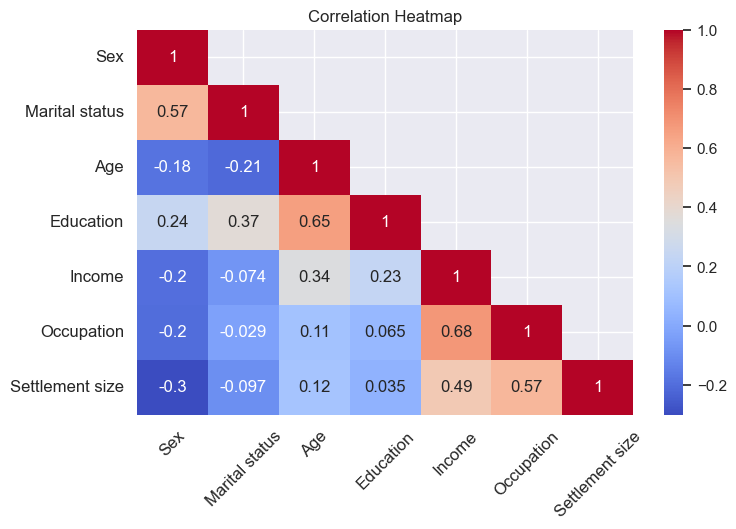

In [7]:
# Correlation estimates through Heatmap

plt.figure(figsize=(8,5))
s = ssn.heatmap(segmentation_df.corr(),
                mask=np.triu(np.ones(len(segmentation_df.corr()))
                             -np.identity(len(segmentation_df.corr()))),
                cmap="coolwarm",
               annot=True)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 45, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

> Income is strongly correlated with Occupation and Settlement_size.

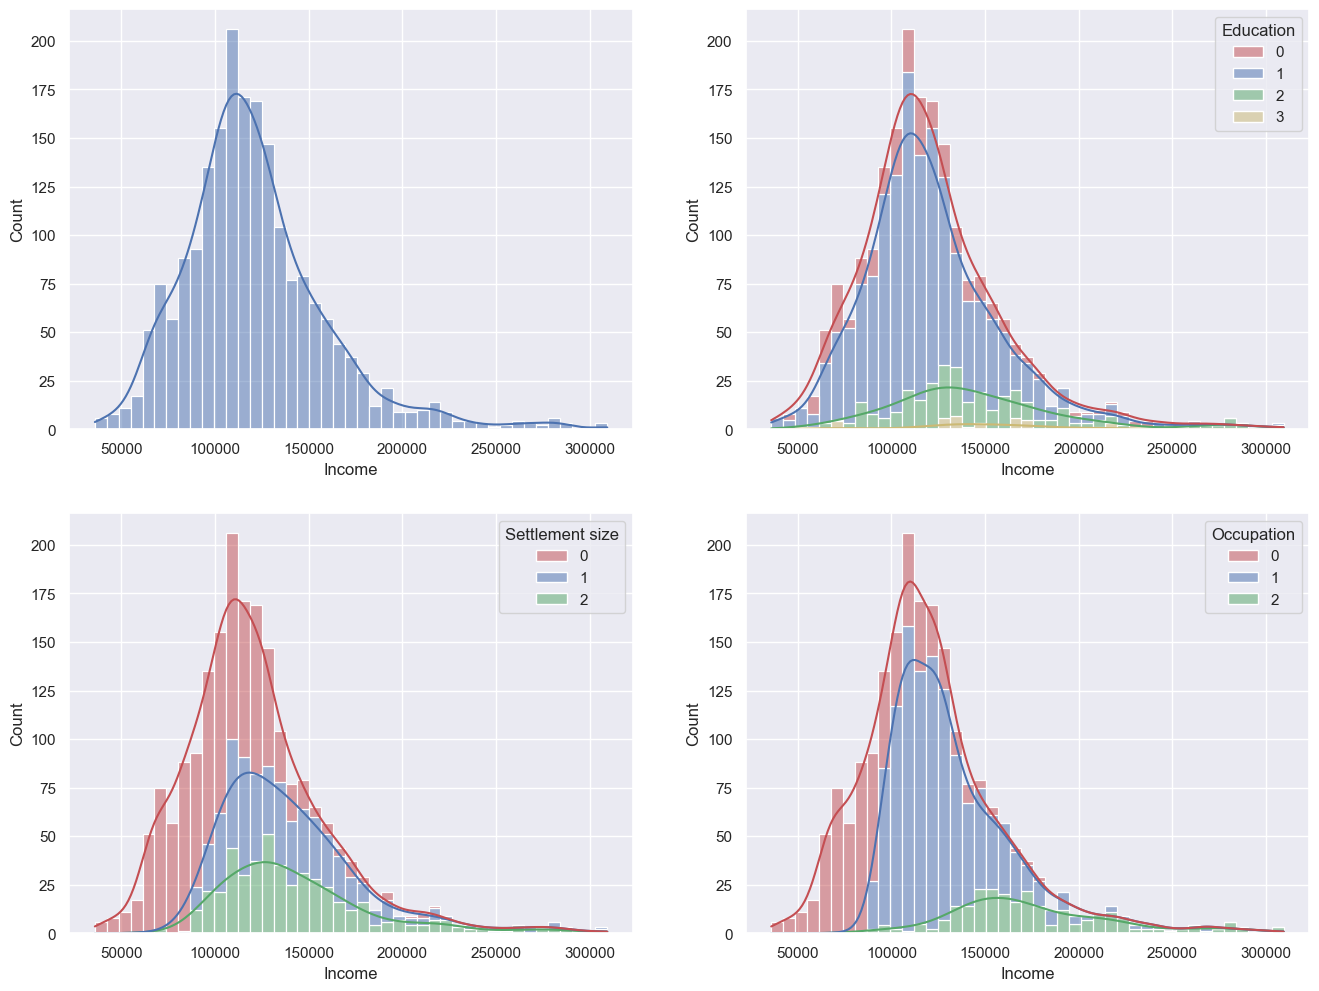

In [8]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
ssn.histplot(data = segmentation_df,x = "Income", kde=True,
             ax=ax[0][0])

ssn.histplot(data = segmentation_df,x = "Income", kde=True, hue = "Education",
             palette=['r','b','g','y'],multiple="stack", ax=ax[0][1])

ssn.histplot(data = segmentation_df,x = "Income", kde=True, hue = "Settlement size",
             palette=['r','b','g'],multiple="stack", ax=ax[1][0])

ssn.histplot(data = segmentation_df,x = "Income", kde=True, hue = "Occupation",
             palette=['r','b','g'],multiple="stack", ax=ax[1][1])

plt.plot();

> Most Distribution scewness can be attributed to Occupation.<br>
> Scewness for Settlement size is considerable as well.<br>
> Education is somewhat equally distributed.

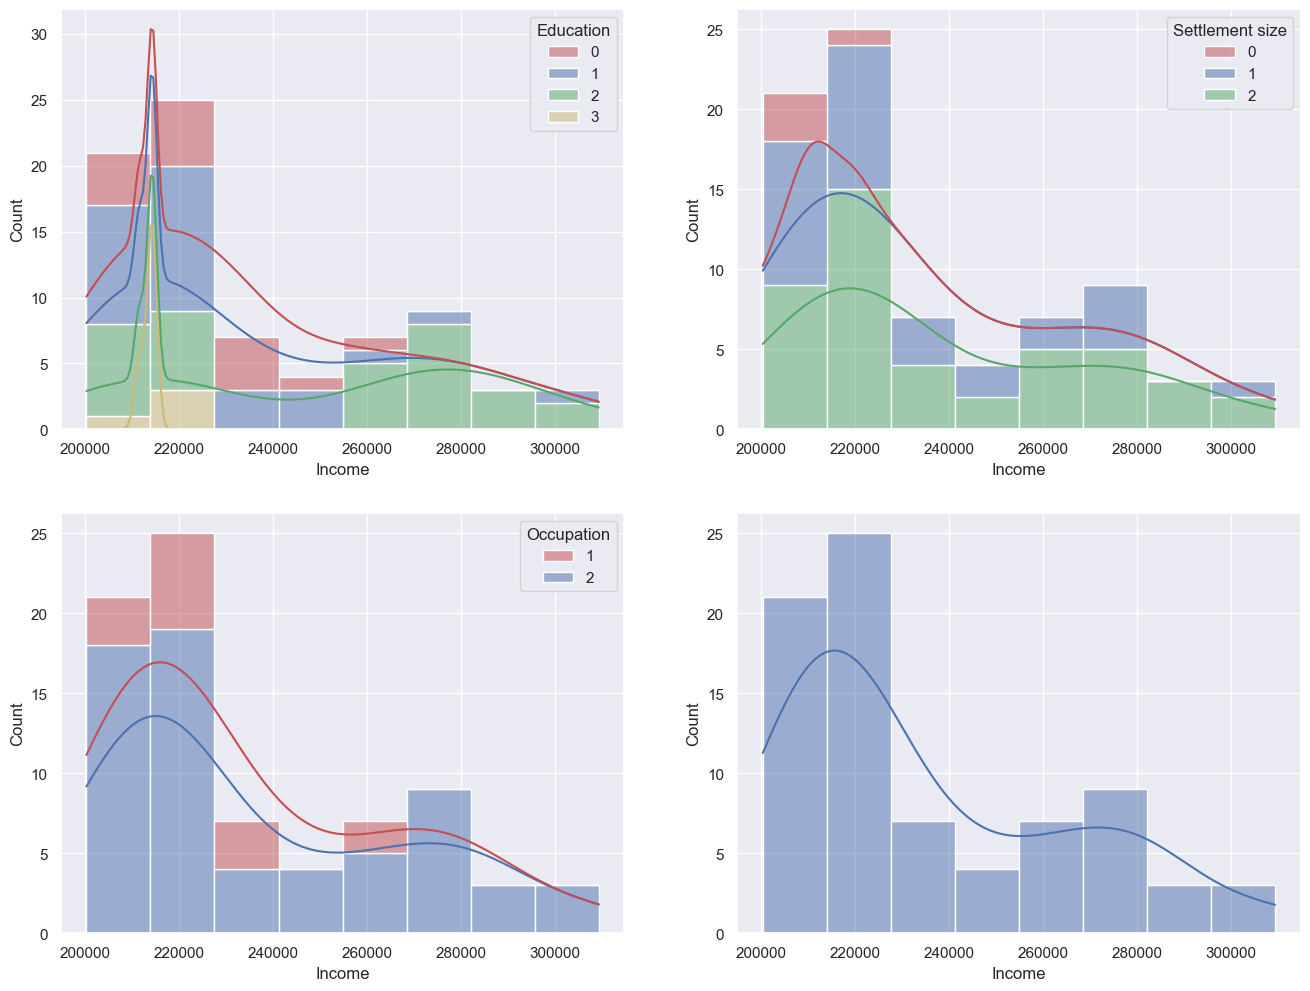

In [9]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

temp  = segmentation_df[segmentation_df["Income"]>200000]

ssn.histplot(data = temp,x = "Income", kde=True, hue = "Education",
             palette=['r','b','g','y'],multiple="stack", ax=ax[0][0])

ssn.histplot(data = temp,x = "Income", kde=True, hue = "Settlement size",
             palette=['r','b','g'], multiple="stack", ax=ax[0][1])

ssn.histplot(data = temp,x = "Income", kde=True, hue = "Occupation",
             palette=['r','b'], multiple="stack", ax=ax[1][0])

ssn.histplot(data = temp,x = "Income", kde=True,
             ax=ax[1][1])
 

plt.plot();

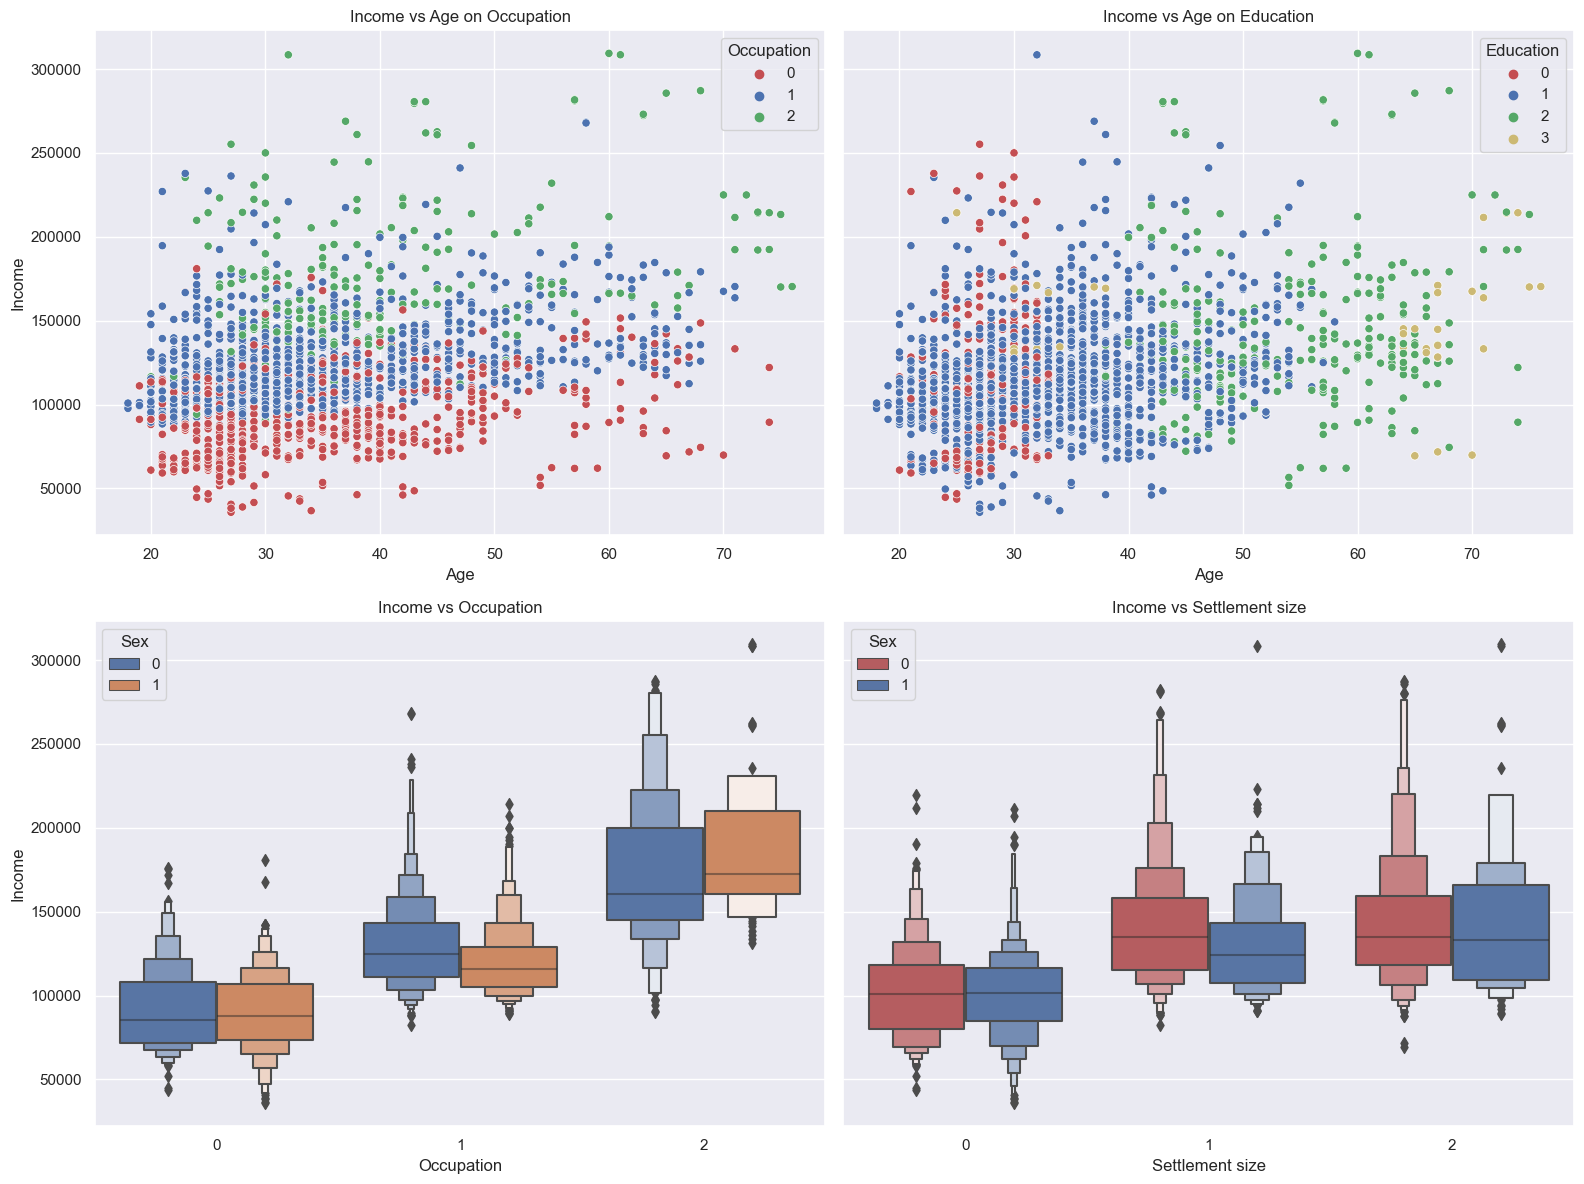

In [10]:
# Scatter plot to identify any obvious clusters

fig, ax = plt.subplots(2,2,figsize=(16,12),sharey=True)


ssn.scatterplot(x=segmentation_df["Age"],
            y=segmentation_df["Income"],
            hue = segmentation_df["Occupation"], palette=['r','b','g'], ax=ax[0][0])

ssn.scatterplot(x=segmentation_df["Age"],
            y=segmentation_df["Income"],
            hue = segmentation_df["Education"], palette=['r','b','g','y'], ax=ax[0][1])

ssn.boxenplot(x = segmentation_df["Occupation"],
            y=segmentation_df["Income"],
            hue =segmentation_df["Sex"],ax=ax[1][0])

ssn.boxenplot(hue=segmentation_df["Sex"],
            y=segmentation_df["Income"],
            x = segmentation_df["Settlement size"], palette=['r','b','g','y'], ax=ax[1][1])

plt.xlabel("Age")
ax[1][0].set_xlabel('Occupation')
ax[1][1].set_xlabel('Settlement size')
ax[1][1].set_ylabel("")
ax[0][0].set_title("Income vs Age on Occupation")
ax[0][1].set_title("Income vs Age on Education")
ax[1][0].set_title("Income vs Occupation")
ax[1][1].set_title("Income vs Settlement size")
ax[0][0].legend(title = "Occupation",loc='upper right')
ax[0][1].legend(title = "Education",loc='upper right')
ax[1][0].legend(title = "Sex",loc='upper left')
ax[1][1].legend(title = "Sex",loc='upper left')
fig.tight_layout() 
plt.show()

### Comments On plots

>Age doesn't seems to justify much variance in Income. However there is a somewhat clear distinction by Income based on Occupation Which is to be expected Higher the income higher the occupation level.

>Customers with age > 55 Years predominately have Higher qualifications <sub>(University degree or above)</sub>. 

>All Unknown Eduction level Customers are below 35 years.

>Income of all customers are right scewed for level 2 Occupation and salaries of Male customers have higher spread For all Occupation and Settlement size .

> Customers in mid-level and big cities have equivalent Income whereas customers from small city earn 50K less on average

## Clustering 

### Standardize

In [11]:
# Apart from Age and Income all variables are ordinal or categorical and scaling those would be illogical
temp = segmentation_df[["Age","Income"]]

In [12]:
scalar = StandardScaler()
temp2 = scalar.fit_transform(temp)
scaled_segmentation_df = segmentation_df.copy()
scaled_segmentation_df[["Age","Income"]] = temp2
scaled_segmentation_df.head()

Sex  Marital status       Age  Education    Income  Occupation  \
ID                                                                          
100000001    0               0  2.653614          2  0.097524           1   
100000002    1               1 -1.187132          1  0.782654           1   
100000003    0               0  1.117316          1 -0.833202           0   
100000004    0               0  0.775916          1  1.328386           1   
100000005    0               0  1.458716          1  0.736932           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

### Hierarichal Clustering

In [13]:
hier_clust = linkage(scaled_segmentation_df, method="ward")

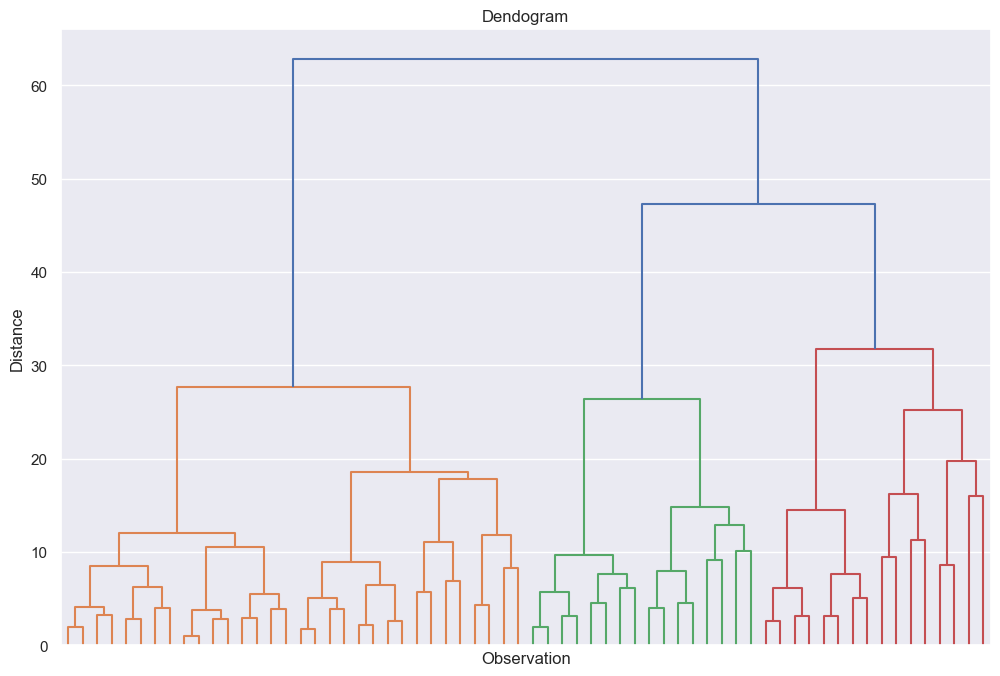

In [14]:
# visualize Dendogram

plt.figure(figsize=(12,8))

plt.title("Dendogram")
plt.xlabel("Observation")
plt.ylabel("Distance")

dendrogram(hier_clust,
          truncate_mode="level",
          p = 5,
          show_leaf_counts= False,
          no_labels=True)

plt.show()

### K-means Clustering

In [15]:

import warnings
warnings.simplefilter("ignore")
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,
                    init="k-means++",
                    random_state=42)
    kmeans.fit(scaled_segmentation_df)
    wcss.append(kmeans.inertia_)

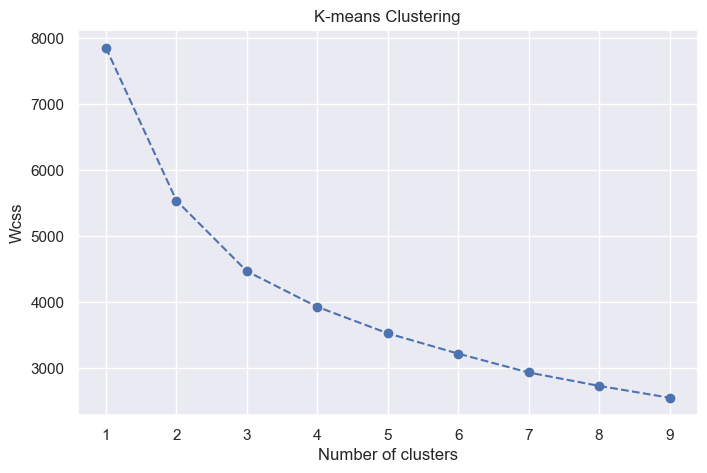

In [16]:
# Plot Wcss Curve to identify optimal number of clusters

plt.figure(figsize=(8,5))
plt.plot(range(1,10),wcss,marker ='o',linestyle ='--')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.title('K-means Clustering')
plt.show()

In [17]:
# As Wcss Elbow is at 3 
kmeans = KMeans(n_clusters=3,
                    init="k-means++",
                    random_state=52)

kmeans.fit(scaled_segmentation_df)

KMeans(n_clusters=3, random_state=52)

In [18]:
### Results

df_seg_kmeans = segmentation_df.copy()

df_seg_kmeans["Segment K-means"] = kmeans.labels_

In [19]:
df_segm_analysis = df_seg_kmeans.groupby(["Segment K-means"]).mean()
df_segm_analysis

Sex  Marital status        Age  Education  \
Segment K-means                                                   
0                0.360795        0.477273  55.417614   1.809659   
1                0.252555        0.404380  31.973723   0.808759   
2                0.637591        0.569055  31.577362   0.919003   

                        Income  Occupation  Settlement size  
Segment K-means                                              
0                154392.491477    1.085227         1.053977  
1                137358.251095    1.210219         1.481752  
2                 97063.633437    0.425753         0.095535

In [20]:
segmentation_df.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

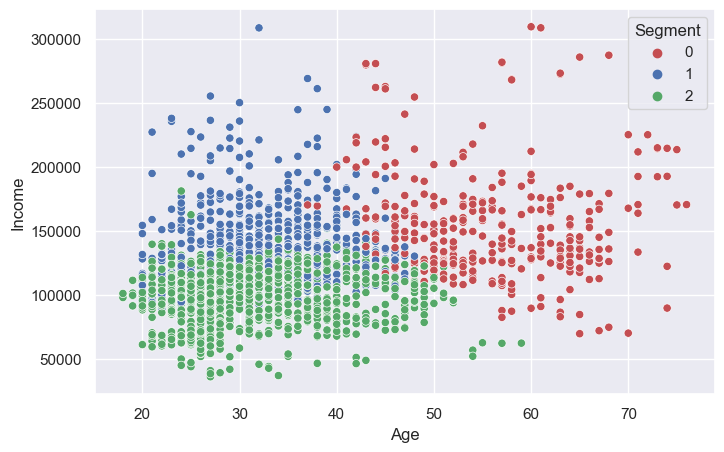

In [21]:
temp_plot = segmentation_df.copy()
temp_plot["Segment"] = kmeans.predict(scaled_segmentation_df) 

fig, ax = plt.subplots(figsize=(8,5))


ssn.scatterplot(x=temp_plot["Age"],
            y=temp_plot["Income"],
            hue = temp_plot["Segment"], palette=['r','b','g'])
plt.plot();

> Judging by this plot Model did pretty well <br>
> Considering there are 7 features and we only used 2 for plot

In [22]:
# Mean values of each Feature for each segment
df_segm_analysis

Sex  Marital status        Age  Education  \
Segment K-means                                                   
0                0.360795        0.477273  55.417614   1.809659   
1                0.252555        0.404380  31.973723   0.808759   
2                0.637591        0.569055  31.577362   0.919003   

                        Income  Occupation  Settlement size  
Segment K-means                                              
0                154392.491477    1.085227         1.053977  
1                137358.251095    1.210219         1.481752  
2                 97063.633437    0.425753         0.095535

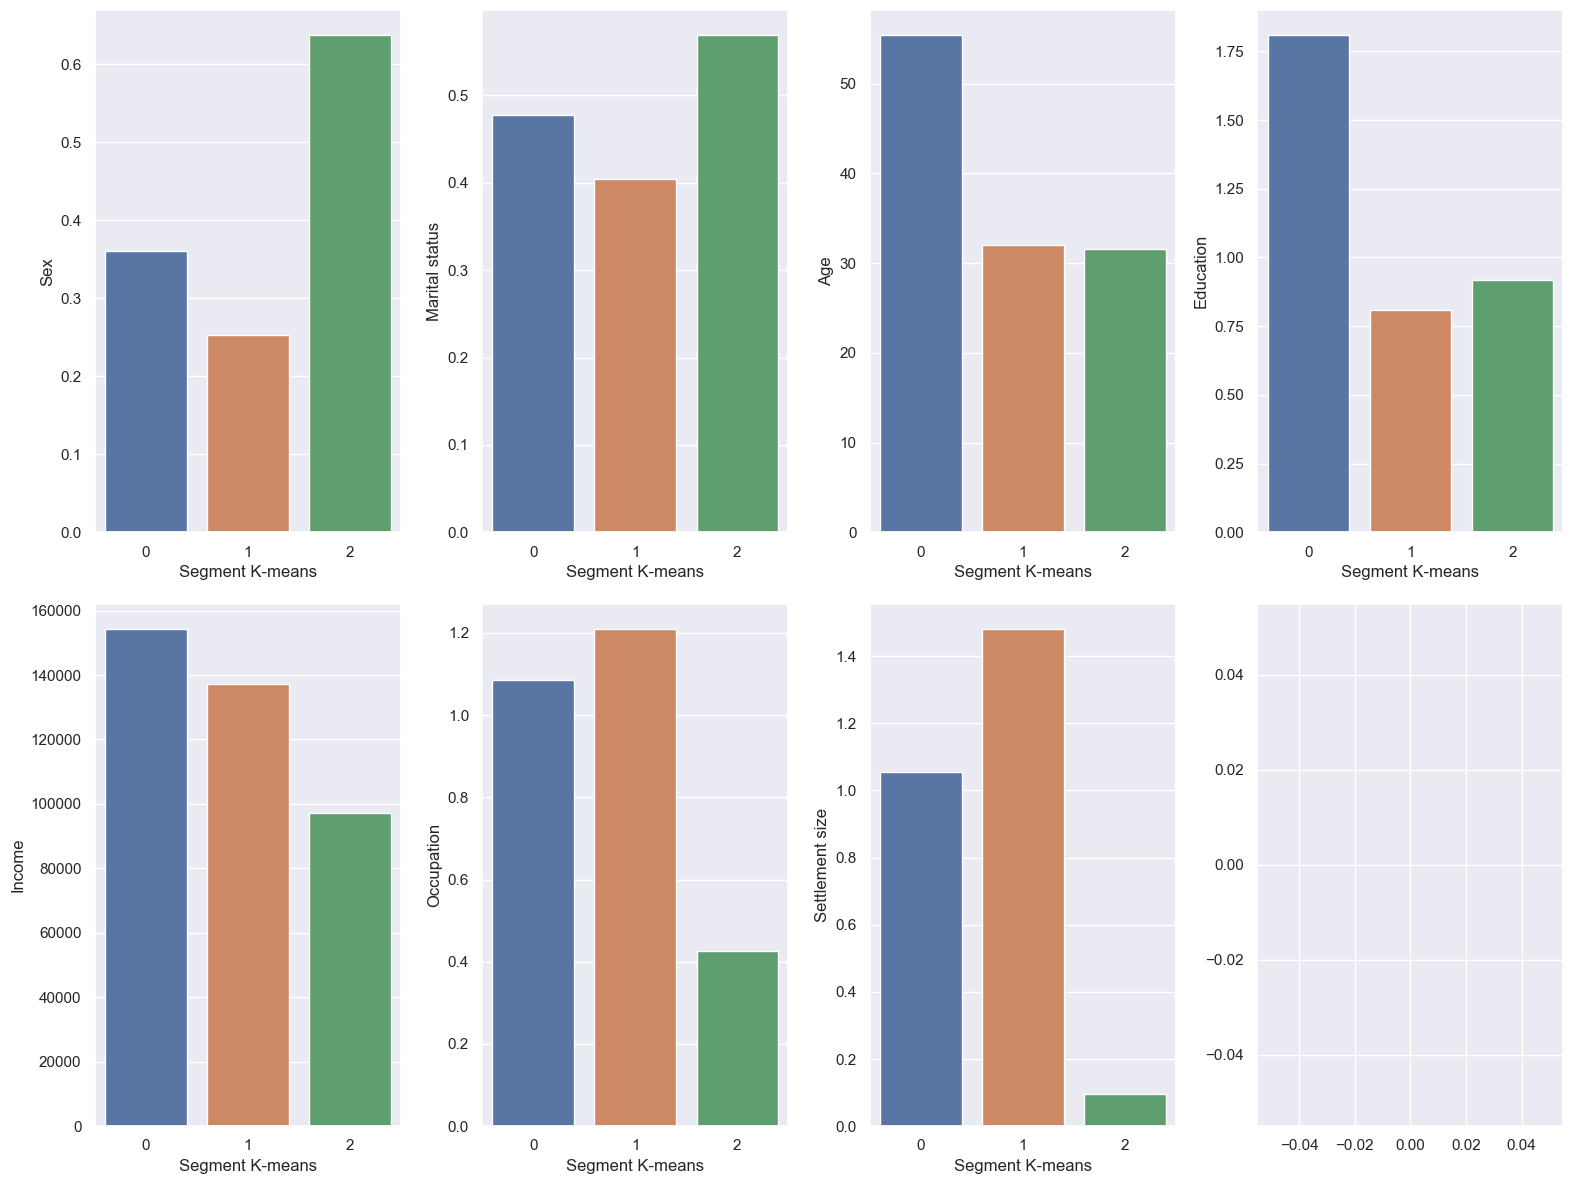

In [23]:
hue = df_segm_analysis.index
fig, ax = plt.subplots(2,4,figsize=(16,12))
j = 0
k = 0
l = 0
for i in df_segm_analysis.columns:
    if k<=3:
        ssn.barplot(x = df_segm_analysis.index, y = df_segm_analysis[i], ax=ax[j][k])
        k+=1
    else:
        j = 1
        ssn.barplot(x = df_segm_analysis.index, y = df_segm_analysis[i], ax=ax[j][l])
        l+=1

fig.tight_layout()
plt.plot();

> 0 : Entrepreneurs : Relatively young group, low Education yet highest Income and live in Major cities

> 1 : Well-off : Oldest group, Highly educated, High Income and live in mid or major cities

> 2 : Workers : Low education, low income, in middle age and live in small cities, Mostly male and predominantly married.

In [24]:
df_segm_analysis.rename({0:'Entrepreneurs',
                         1:'well-off',
                         2:'Workers'})

Sex  Marital status        Age  Education  \
Segment K-means                                                   
Entrepreneurs    0.360795        0.477273  55.417614   1.809659   
well-off         0.252555        0.404380  31.973723   0.808759   
Workers          0.637591        0.569055  31.577362   0.919003   

                        Income  Occupation  Settlement size  
Segment K-means                                              
Entrepreneurs    154392.491477    1.085227         1.053977  
well-off         137358.251095    1.210219         1.481752  
Workers           97063.633437    0.425753         0.095535

In [25]:
# Compute Size and proportions of four clusters

df_segm_analysis['N_Obs'] = df_seg_kmeans[["Segment K-means","Sex"]].groupby(['Segment K-means']).count()
df_segm_analysis['Obs_prop'] = df_segm_analysis['N_Obs'] / df_segm_analysis['N_Obs'].sum()

In [26]:
df_segm_analysis

Sex  Marital status        Age  Education  \
Segment K-means                                                   
0                0.360795        0.477273  55.417614   1.809659   
1                0.252555        0.404380  31.973723   0.808759   
2                0.637591        0.569055  31.577362   0.919003   

                        Income  Occupation  Settlement size  N_Obs  Obs_prop  
Segment K-means                                                               
0                154392.491477    1.085227         1.053977    352    0.1760  
1                137358.251095    1.210219         1.481752    685    0.3425  
2                 97063.633437    0.425753         0.095535    963    0.4815

In [27]:
df_segm_analysis.rename({0:'Entrepreneurs',
                         1:'well-off',
                         2:'Workers'})

Sex  Marital status        Age  Education  \
Segment K-means                                                   
Entrepreneurs    0.360795        0.477273  55.417614   1.809659   
well-off         0.252555        0.404380  31.973723   0.808759   
Workers          0.637591        0.569055  31.577362   0.919003   

                        Income  Occupation  Settlement size  N_Obs  Obs_prop  
Segment K-means                                                               
Entrepreneurs    154392.491477    1.085227         1.053977    352    0.1760  
well-off         137358.251095    1.210219         1.481752    685    0.3425  
Workers           97063.633437    0.425753         0.095535    963    0.4815

In [28]:
# Add the segment labels to our table
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment K-means'].map({0:'Entrepreneurs',
                                                                1:'well-off',
                                                                2:'Workers'})

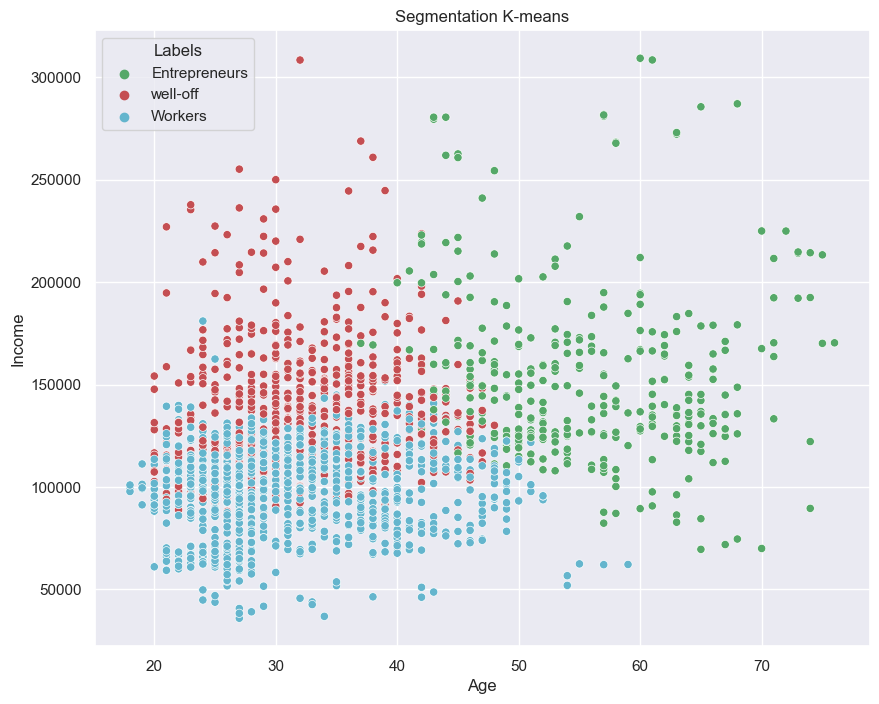

In [29]:
x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']
plt.figure(figsize = (10, 8))
ssn.scatterplot(x=x_axis,y= y_axis, hue = df_seg_kmeans['Labels'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

## PCA

> Principal Component Analysis, convert set of correlated variables to uncoorelated variables through orthogonal transformation

In [30]:
pca = PCA()
pca.fit(scaled_segmentation_df)

PCA()

In [31]:
pca.explained_variance_ratio_

array([0.45071403, 0.2518607 , 0.12431802, 0.09203774, 0.03798222,
       0.02811108, 0.01497622])

Text(0, 0.5, 'Cumulative Explained Variance')

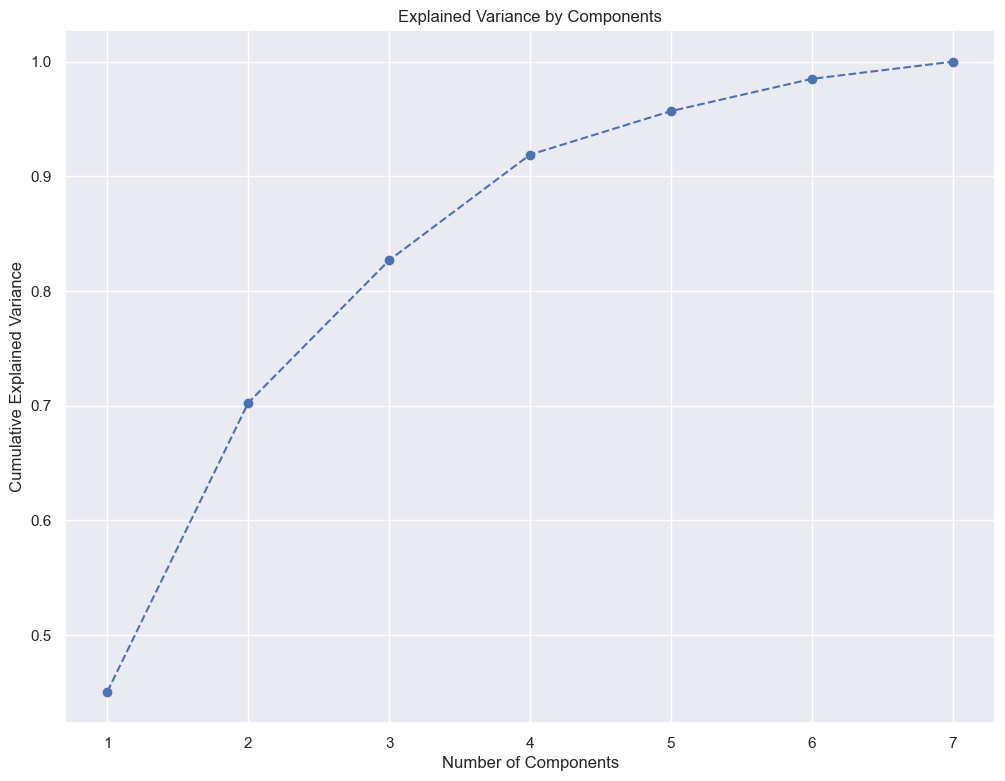

In [32]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [33]:
# 4 components can account for more than 90% of variance and slope reduces drastically after 4.

pca = PCA(n_components = 4)
pca.fit(scaled_segmentation_df)

PCA(n_components=4)

### PCA Results

In [34]:
pca.components_

array([[-0.11254574, -0.05833892,  0.4968568 ,  0.20395228,  0.66103914,
         0.32983372,  0.38691574],
       [ 0.07582877,  0.00572165,  0.72680511,  0.38133677, -0.26686774,
        -0.30644933, -0.39423887],
       [ 0.53521007,  0.59947397, -0.24029635,  0.39251245,  0.28247463,
         0.10703727, -0.22610593],
       [ 0.11327755,  0.27188471,  0.05468965,  0.274161  , -0.51489906,
        -0.01858166,  0.7547353 ]])

In [35]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = scaled_segmentation_df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4'])
df_pca_comp

Sex  Marital status       Age  Education    Income  \
Component 1 -0.112546       -0.058339  0.496857   0.203952  0.661039   
Component 2  0.075829        0.005722  0.726805   0.381337 -0.266868   
Component 3  0.535210        0.599474 -0.240296   0.392512  0.282475   
Component 4  0.113278        0.271885  0.054690   0.274161 -0.514899   

             Occupation  Settlement size  
Component 1    0.329834         0.386916  
Component 2   -0.306449        -0.394239  
Component 3    0.107037        -0.226106  
Component 4   -0.018582         0.754735

([<matplotlib.axis.YTick at 0x1f4473dc7f0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

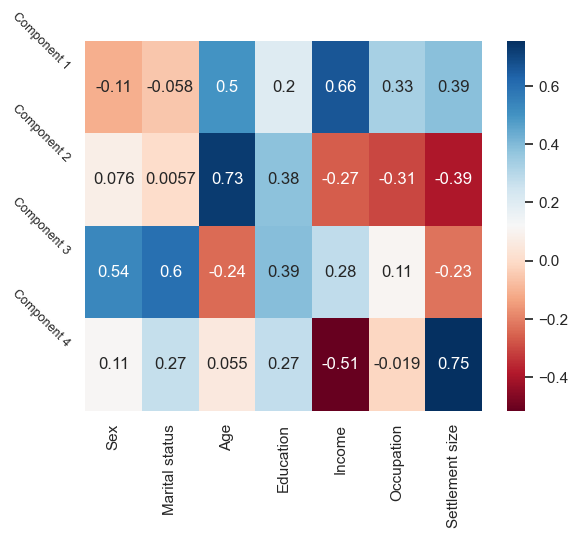

In [36]:
ssn.heatmap(df_pca_comp,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3], 
           ['Component 1', 'Component 2', 'Component 3','Component 4'],
           rotation = -45,
           fontsize = 9)

In [37]:
pca.transform(scaled_segmentation_df)

array([[ 2.20993834,  1.6767787 , -1.03957478,  1.12009469],
       [ 0.37969859, -1.59732116,  0.81904624,  0.66827369],
       [-0.47624578,  1.52216002, -0.98065214, -0.249745  ],
       ...,
       [-1.49227319,  0.04391631, -1.02483145, -0.56994943],
       [-1.55534263, -0.00845425,  0.73169707, -0.09963807],
       [-2.05874345, -0.20231075, -1.03511222, -0.35490832]])

In [38]:
scores_pca = pca.transform(scaled_segmentation_df)

### K-Means with PCA

In [39]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

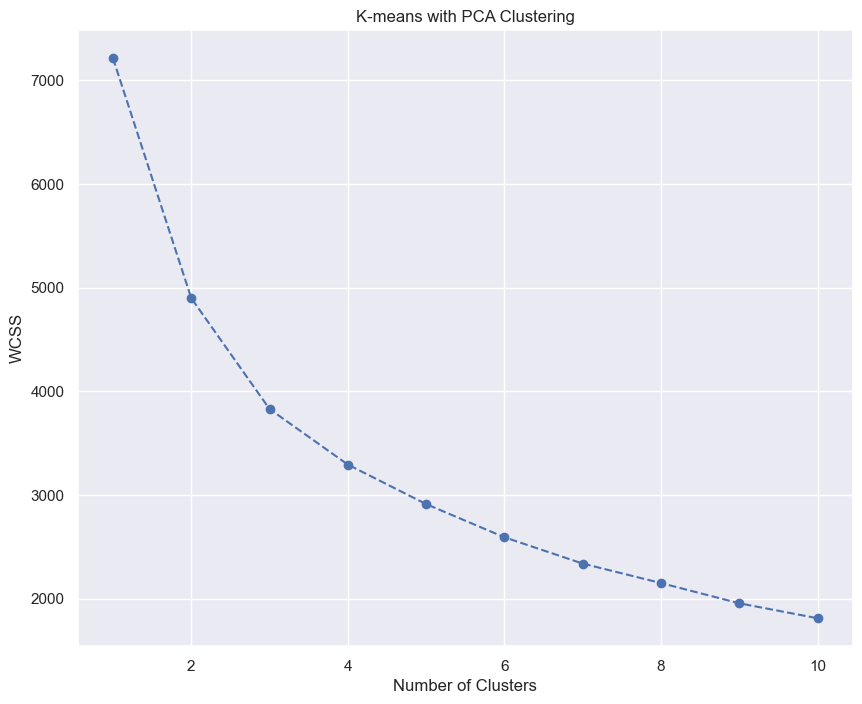

In [40]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [41]:
# Still elbow is at 3
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=2)

### K-Means clustering with PCA Results

In [42]:
seg_kmean_pca_df = pd.concat([segmentation_df.reset_index(drop = True),pd.DataFrame(scores_pca)],axis = 1)
seg_kmean_pca_df.columns.values[-4:] = ["Comp_1","Comp_2","Comp_3","Comp_4"]

seg_kmean_pca_df['Segment K-means PCA'] = kmeans_pca.labels_

seg_kmean_pca_df.head(3)

Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
0    0               0   67          2  124670           1                2   
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   

     Comp_1    Comp_2    Comp_3    Comp_4  Segment K-means PCA  
0  2.209938  1.676779 -1.039575  1.120095                    0  
1  0.379699 -1.597321  0.819046  0.668274                    2  
2 -0.476246  1.522160 -0.980652 -0.249745                    1

In [43]:
seg_kmean_pca_frq = seg_kmean_pca_df.groupby(['Segment K-means PCA']).mean()
seg_kmean_pca_frq

Sex  Marital status        Age  Education  \
Segment K-means PCA                                                   
0                    0.360795        0.477273  55.417614   1.809659   
1                    0.636458        0.568750  31.571875   0.919792   
2                    0.255814        0.405523  31.979651   0.808140   

                            Income  Occupation  Settlement size    Comp_1  \
Segment K-means PCA                                                         
0                    154392.491477    1.085227         1.053977  1.789275   
1                     97056.497917    0.422917         0.092708 -1.024982   
2                    137192.504360    1.210756         1.479651  0.514764   

                       Comp_2    Comp_3    Comp_4  
Segment K-means PCA                                
0                    1.054446  0.045866  0.067210  
1                    0.240862  0.109374 -0.170285  
2                   -0.875571 -0.176081  0.203221

In [44]:
seg_kmean_pca_frq['N Obs'] = seg_kmean_pca_df[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
seg_kmean_pca_frq['Prop Obs'] = seg_kmean_pca_frq['N Obs'] / seg_kmean_pca_frq['N Obs'].sum()
seg_kmean_pca_frq = seg_kmean_pca_frq.rename({0:'Entrepreneurs',
                                              1:'well-off',
                                              2:'Workers'})

seg_kmean_pca_frq

Sex  Marital status        Age  Education  \
Segment K-means PCA                                                   
Entrepreneurs        0.360795        0.477273  55.417614   1.809659   
well-off             0.636458        0.568750  31.571875   0.919792   
Workers              0.255814        0.405523  31.979651   0.808140   

                            Income  Occupation  Settlement size    Comp_1  \
Segment K-means PCA                                                         
Entrepreneurs        154392.491477    1.085227         1.053977  1.789275   
well-off              97056.497917    0.422917         0.092708 -1.024982   
Workers              137192.504360    1.210756         1.479651  0.514764   

                       Comp_2    Comp_3    Comp_4  N Obs  Prop Obs  
Segment K-means PCA                                                 
Entrepreneurs        1.054446  0.045866  0.067210    352     0.176  
well-off             0.240862  0.109374 -0.170285    960     0.480  
Workers             -0.875571 -0.176081  0.203221    688     0.344

In [45]:
seg_kmean_pca_df['Legend'] = seg_kmean_pca_df['Segment K-means PCA'].map({0:'Entrepreneurs',
                                                                          1:'well-off',
                                                                          2:'Workers'})
seg_kmean_pca_df

Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size    Comp_1    Comp_2    Comp_3    Comp_4  \
0                   2  2.209938  1.676779 -1.039575  1.120095   
1                   2  0.379699 -1.597321  0.819046  0.668274   
2                   0 -0.476246  1.522160 -0.980652 -0.249745   
3                   1  1.499771 -0.003517 -0.407090 -0.645262   
4                   1  1.448050  0.650585 -0.738235 -0.303381   
...               ...       ...       ...       ...       ...   
1995                0 -0.078225  1.233563 -0.150006 -0.609559   
1996                0 -0.755167 -0.267327  0.923829 -0.371482   
1997                0 -1.492273  0.043916 -1.024831 -0.569949   
1998                0 -1.555343 -0.008454  0.731697 -0.099638   
1999                0 -2.058743 -0.202311 -1.035112 -0.354908   

      Segment K-means PCA         Legend  
0                       0  Entrepreneurs  
1                       2        Workers  
2                       1       well-off  
3                       0  Entrepreneurs  
4                       0  Entrepreneurs  
...                   ...            ...  
1995                    1       well-off  
1996                    1       well-off  
1997                    1       well-off  
1998                    1       well-off  
1999                    1       well-off  

[2000 rows x 13 columns]

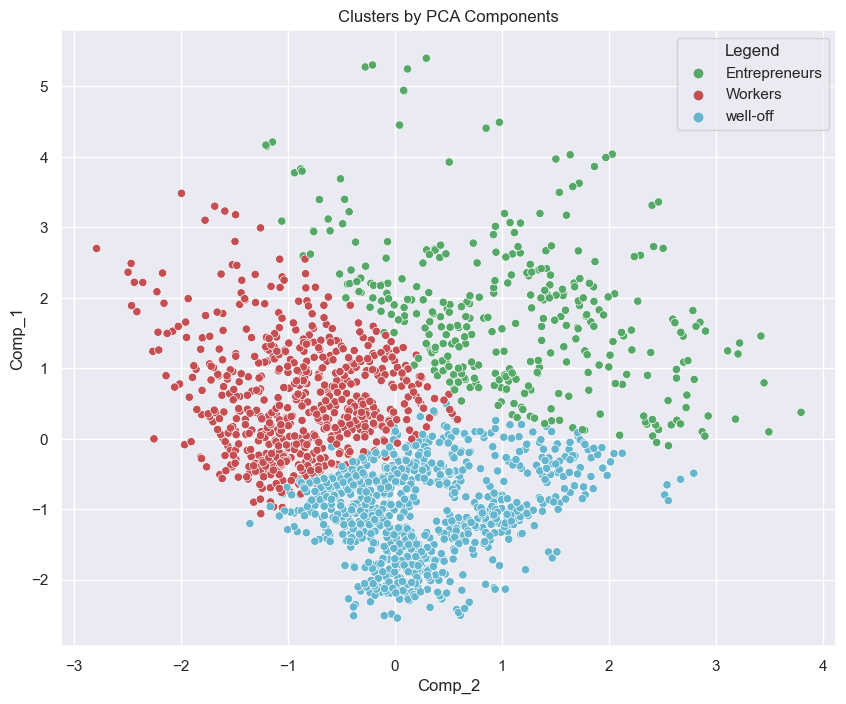

In [46]:
# PLot PCA components 

x_axis = seg_kmean_pca_df['Comp_2']
y_axis = seg_kmean_pca_df['Comp_1']
plt.figure(figsize = (10, 8))
ssn.scatterplot(x=x_axis, y=y_axis, hue = seg_kmean_pca_df['Legend'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

> Reducing Components from 7 to 4 improved clustering <br>
> Just using 2 components shows almost completely distinct clusters<br>
> FYI Comp_1 and comp_2 defines over 70% of variance (from Explained variance by component plot)

> Now Plotting all Component pairs to show estimates of how much variance each pair defines

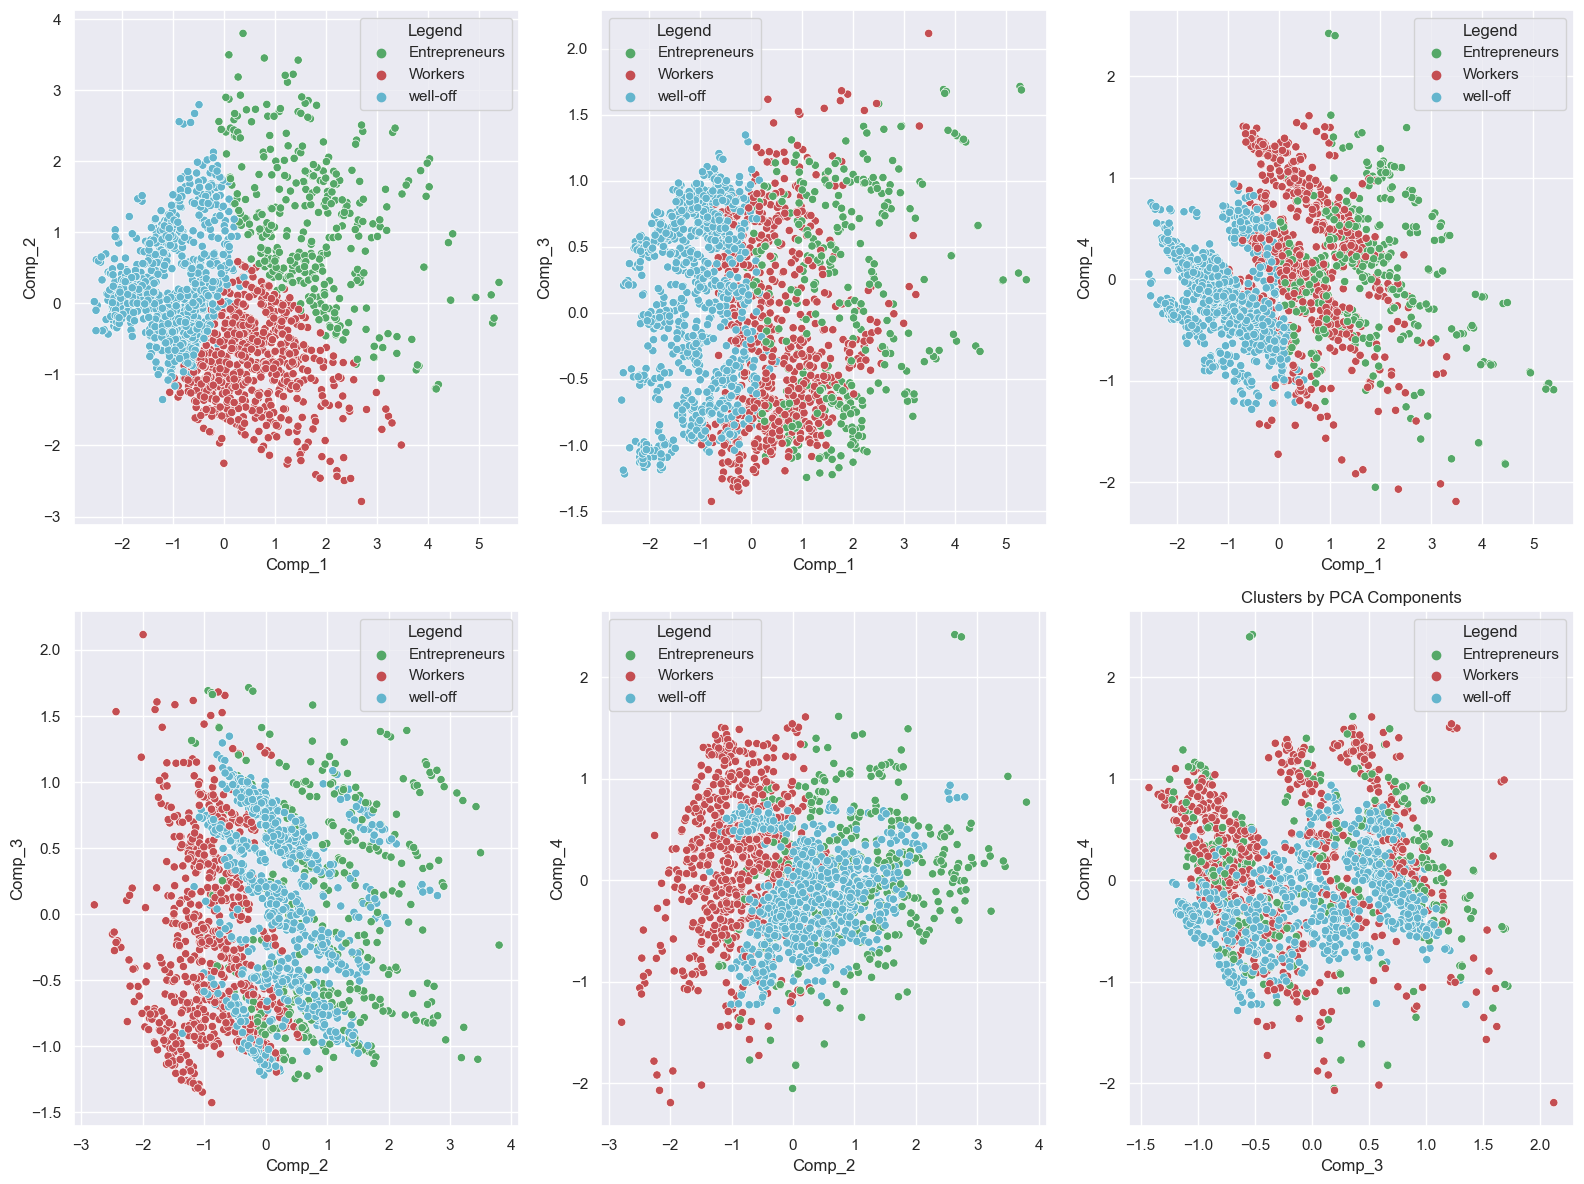

In [47]:
column_index = range(seg_kmean_pca_df.columns.get_loc("Comp_1"),seg_kmean_pca_df.columns.get_loc("Comp_4")+1)
fig, ax = plt.subplots(2,3,figsize=(16,12))
for i in column_index:
    j = i+1
    k = i
    while j<11:
            x_axis = seg_kmean_pca_df[seg_kmean_pca_df.columns[i]]
            y_axis = seg_kmean_pca_df[seg_kmean_pca_df.columns[j]]
            if i <9:
                ssn.scatterplot(x=x_axis, y=y_axis, hue = seg_kmean_pca_df['Legend']
                                , palette = ['g', 'r', 'c'],ax=ax[k-column_index[0]][j-(i+1)])
                j+=1
            else :
                ssn.scatterplot(x=x_axis, y=y_axis, hue = seg_kmean_pca_df['Legend']
                            , palette = ['g', 'r', 'c'],ax=ax[k-column_index[1]][j-(i-1)])
                j+=1
            
            
plt.title('Clusters by PCA Components')
plt.tight_layout()
plt.show()

## Data Export

In [48]:
np.unique(kmeans_pca.labels_)

array([0, 1, 2])

## Descriptive Data Analysis

### Preprocessing

In [49]:
df_purchase = pd.read_csv("purchase data.csv")
df_purchase.head(5)

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Promotion_3  \
0                  0     1.59     1.87     2.01  ...            0   
1                  0     1.51     1.89     1.99  ...            0   
2                  0     1.51     1.89     1.99  ...            0   
3                  0     1.52     1.89     1.98  ...            0   
4                  0     1.52     1.89     1.99  ...            0   

   Promotion_4  Promotion_5  Sex  Marital status  Age  Education  Income  \
0            0            0    0               0   47          1  110866   
1            0            0    0               0   47          1  110866   
2            0            0    0               0   47          1  110866   
3            0            0    0               0   47          1  110866   
4            0            0    0               0   47          1  110866   

   Occupation  Settlement size  
0           1                0  
1           1                0  
2           1                0  
3           1                0  
4           1                0  

[5 rows x 24 columns]

In [50]:
df_purchase.columns.to_frame()

0
ID                                ID
Day                              Day
Incidence                  Incidence
Brand                          Brand
Quantity                    Quantity
Last_Inc_Brand        Last_Inc_Brand
Last_Inc_Quantity  Last_Inc_Quantity
Price_1                      Price_1
Price_2                      Price_2
Price_3                      Price_3
Price_4                      Price_4
Price_5                      Price_5
Promotion_1              Promotion_1
Promotion_2              Promotion_2
Promotion_3              Promotion_3
Promotion_4              Promotion_4
Promotion_5              Promotion_5
Sex                              Sex
Marital status        Marital status
Age                              Age
Education                  Education
Income                        Income
Occupation                Occupation
Settlement size      Settlement size

### Import Segmetation models

In [51]:
temp = scalar.transform(df_purchase[['Age','Income']])
features = df_purchase[["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]]
features[['Age','Income']] = temp

In [52]:
df_purchase_segm_pca = pca.fit_transform(features)
df_purchase_segm_pca

array([[-0.01243232,  0.7204312 , -0.45935543, -0.56153629],
       [-0.01243232,  0.7204312 , -0.45935543, -0.56153629],
       [-0.01243232,  0.7204312 , -0.45935543, -0.56153629],
       ...,
       [-0.05557839,  0.31350361, -0.31350249, -0.67808902],
       [-0.05557839,  0.31350361, -0.31350249, -0.67808902],
       [-0.05557839,  0.31350361, -0.31350249, -0.67808902]])

In [53]:
df_purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)
np.unique(df_purchase_segm_kmeans_pca)

array([0, 1, 2])

In [54]:
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = df_purchase_segm_kmeans_pca
df_purchase_predictors

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0      200000001    1          0      0         0               0   
1      200000001   11          0      0         0               0   
2      200000001   12          0      0         0               0   
3      200000001   16          0      0         0               0   
4      200000001   18          0      0         0               0   
...          ...  ...        ...    ...       ...             ...   
58688  200000500  703          0      0         0               2   
58689  200000500  710          0      0         0               0   
58690  200000500  717          0      0         0               0   
58691  200000500  722          1      2         3               0   
58692  200000500  726          0      0         0               2   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Promotion_4  \
0                      0     1.59     1.87     2.01  ...            0   
1                      0     1.51     1.89     1.99  ...            0   
2                      0     1.51     1.89     1.99  ...            0   
3                      0     1.52     1.89     1.98  ...            0   
4                      0     1.52     1.89     1.99  ...            0   
...                  ...      ...      ...      ...  ...          ...   
58688                  1     1.41     1.85     2.01  ...            0   
58689                  0     1.36     1.84     2.09  ...            0   
58690                  0     1.50     1.80     2.14  ...            0   
58691                  0     1.51     1.82     2.09  ...            0   
58692                  1     1.51     1.82     2.09  ...            0   

       Promotion_5  Sex  Marital status  Age  Education  Income  Occupation  \
0                0    0               0   47          1  110866           1   
1                0    0               0   47          1  110866           1   
2                0    0               0   47          1  110866           1   
3                0    0               0   47          1  110866           1   
4                0    0               0   47          1  110866           1   
...            ...  ...             ...  ...        ...     ...         ...   
58688            0    0               0   42          1  120946           1   
58689            0    0               0   42          1  120946           1   
58690            0    0               0   42          1  120946           1   
58691            0    0               0   42          1  120946           1   
58692            0    0               0   42          1  120946           1   

       Settlement size  Segment  
0                    0        1  
1                    0        1  
2                    0        1  
3                    0        1  
4                    0        1  
...                ...      ...  
58688                0        1  
58689                0        1  
58690                0        1  
58691                0        1  
58692                0        1  

[58693 rows x 25 columns]

In [55]:
df_purchase_predictors.head(5)

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Promotion_4  \
0                  0     1.59     1.87     2.01  ...            0   
1                  0     1.51     1.89     1.99  ...            0   
2                  0     1.51     1.89     1.99  ...            0   
3                  0     1.52     1.89     1.98  ...            0   
4                  0     1.52     1.89     1.99  ...            0   

   Promotion_5  Sex  Marital status  Age  Education  Income  Occupation  \
0            0    0               0   47          1  110866           1   
1            0    0               0   47          1  110866           1   
2            0    0               0   47          1  110866           1   
3            0    0               0   47          1  110866           1   
4            0    0               0   47          1  110866           1   

   Settlement size  Segment  
0                0        1  
1                0        1  
2                0        1  
3                0        1  
4                0        1  

[5 rows x 25 columns]

In [56]:
df_purchase["Incidence"].unique()

array([0, 1], dtype=int64)

In [57]:
# Purchase occasions by ID
temp1 = df_purchase[["ID","Incidence"]].groupby("ID").count()
temp1.rename(columns={'Incidence':'N_Visits'}, inplace=True)

In [58]:
temp1

N_Visits
ID                 
200000001       101
200000002        87
200000003        97
200000004        85
200000005       111
...             ...
200000496       120
200000497       120
200000498       131
200000499       106
200000500       124

[500 rows x 1 columns]

In [59]:
len(df_purchase["ID"].unique())

500

In [60]:
# Number of purchases per ID

temp2 = df_purchase[["ID","Incidence"]].groupby("ID").sum()
temp2.rename(columns={'Incidence':'N_Purchases'}, inplace=True)
temp2['N_visits'] = temp1['N_Visits']
temp2

N_Purchases  N_visits
ID                              
200000001            9       101
200000002           11        87
200000003           10        97
200000004           11        85
200000005           13       111
...                ...       ...
200000496           20       120
200000497           43       120
200000498           39       131
200000499           31       106
200000500           15       124

[500 rows x 2 columns]

In [61]:
# Average No. of Purchases per customer
temp2['Avg_Purchases'] = temp2["N_Purchases"]/temp2["N_visits"]
temp2

N_Purchases  N_visits  Avg_Purchases
ID                                             
200000001            9       101       0.089109
200000002           11        87       0.126437
200000003           10        97       0.103093
200000004           11        85       0.129412
200000005           13       111       0.117117
...                ...       ...            ...
200000496           20       120       0.166667
200000497           43       120       0.358333
200000498           39       131       0.297710
200000499           31       106       0.292453
200000500           15       124       0.120968

[500 rows x 3 columns]

In [62]:
# Segment of each customer 

temp3 = df_purchase_predictors[["ID","Segment"]].groupby(['ID']).mean()
df_purchase_descr = temp2.join(temp3)

df_purchase_descr.head(5)

N_Purchases  N_visits  Avg_Purchases  Segment
ID                                                      
200000001            9       101       0.089109      1.0
200000002           11        87       0.126437      0.0
200000003           10        97       0.103093      1.0
200000004           11        85       0.129412      1.0
200000005           13       111       0.117117      2.0

In [63]:
df_purchase_descr['Segment'] = df_purchase_descr['Segment'].astype('int')
df_purchase_descr.head(5)

N_Purchases  N_visits  Avg_Purchases  Segment
ID                                                      
200000001            9       101       0.089109        1
200000002           11        87       0.126437        0
200000003           10        97       0.103093        1
200000004           11        85       0.129412        1
200000005           13       111       0.117117        2

In [64]:
seg_prop = df_purchase_descr[['N_visits','Segment']].groupby(['Segment']).count()/df_purchase_descr['Segment'].count()
seg_prop.rename(columns={'N_visits':'Segment_prop'},inplace=True)
seg_prop 

Segment_prop
Segment              
0               0.206
1               0.490
2               0.304

Text(0.5, 1.0, 'Segment Proportions')

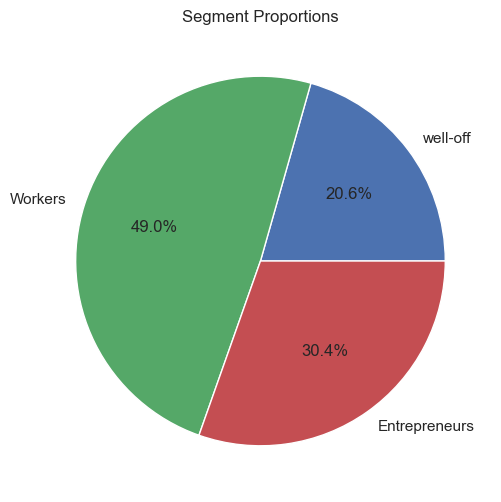

In [65]:
plt.figure(figsize = (9, 6))
plt.pie(seg_prop['Segment_prop'],
        labels = ['well-off','Workers','Entrepreneurs'],
        autopct = '%.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

In [66]:
seg_mean = df_purchase_descr.groupby(["Segment"]).mean()
seg_mean

N_Purchases    N_visits  Avg_Purchases
Segment                                        
0          36.533981  119.631068       0.283581
1          22.857143  114.930612       0.200608
2          34.703947  119.822368       0.267619

In [67]:
seg_std = df_purchase_descr.groupby(["Segment"]).std()
seg_std

N_Purchases   N_visits  Avg_Purchases
Segment                                       
0          37.727042  30.947454       0.178090
1          13.319836  17.606330       0.114163
2          41.579548  34.429716       0.186085

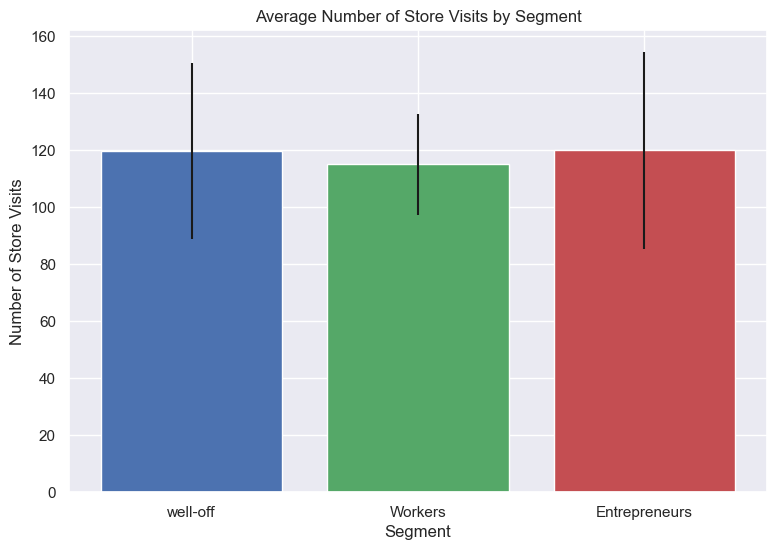

In [68]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2),
        tick_label = ('well-off','Workers','Entrepreneurs'), 
        height = seg_mean['N_visits'],
        yerr = seg_std['N_visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment');

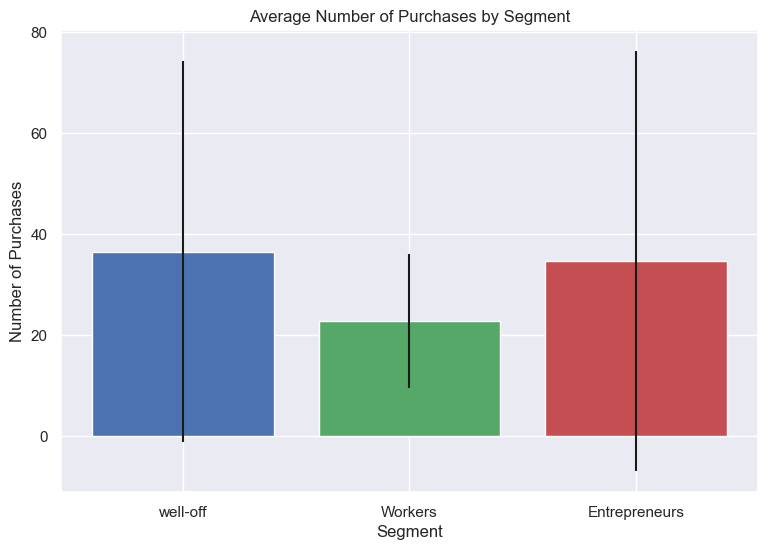

In [69]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2),
        tick_label = ('well-off','Workers','Entrepreneurs'), 
        height = seg_mean['N_Purchases'],
        yerr = seg_std['N_Purchases'],
        color = ('b', 'g', 'r'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title('Average Number of Purchases by Segment');

#### Comments on Analysis so far

> Although Half of customers falls under Entreprenure category this group<br> accounts for least number of purchases and visits to shop. And are most consistent in their behaviour.<br>

> Well-off and workers group show high variance in Purchases.<br>
> And On an average each group Purchase about 1.5X the Entreprenure despite consisting of only 50% of customers altogether.

### Brand Choice

#### Assuming Customer is in shop and has decided to make a purchase.

In [70]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
6      200000001   28          1      2         2               0   
11     200000001   58          1      5         1               0   
19     200000001  110          1      1         2               0   
24     200000001  142          1      4         1               0   
29     200000001  183          1      2         3               0   
...          ...  ...        ...    ...       ...             ...   
58621  200000500  296          1      2         6               0   
58648  200000500  460          1      1        12               0   
58674  200000500  641          1      2         7               0   
58687  200000500  697          1      2         6               0   
58691  200000500  722          1      2         3               0   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Promotion_4  \
6                      0     1.50     1.90     1.99  ...            0   
11                     0     1.39     1.90     1.91  ...            0   
19                     0     1.47     1.90     1.99  ...            1   
24                     0     1.21     1.35     1.99  ...            0   
29                     0     1.46     1.88     1.97  ...            1   
...                  ...      ...      ...      ...  ...          ...   
58621                  0     1.48     1.89     2.01  ...            0   
58648                  0     1.35     1.57     2.02  ...            0   
58674                  0     1.50     1.85     2.06  ...            0   
58687                  0     1.42     1.51     1.97  ...            0   
58691                  0     1.51     1.82     2.09  ...            0   

       Promotion_5  Sex  Marital status  Age  Education  Income  Occupation  \
6                0    0               0   47          1  110866           1   
11               1    0               0   47          1  110866           1   
19               0    0               0   47          1  110866           1   
24               0    0               0   47          1  110866           1   
29               1    0               0   47          1  110866           1   
...            ...  ...             ...  ...        ...     ...         ...   
58621            0    0               0   42          1  120946           1   
58648            0    0               0   42          1  120946           1   
58674            0    0               0   42          1  120946           1   
58687            0    0               0   42          1  120946           1   
58691            0    0               0   42          1  120946           1   

       Settlement size  Segment  
6                    0        1  
11                   0        1  
19                   0        1  
24                   0        1  
29                   0        1  
...                ...      ...  
58621                0        1  
58648                0        1  
58674                0        1  
58687                0        1  
58691                0        1  

[14638 rows x 25 columns]

In [71]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

Brand_1  Brand_2  Brand_3  Brand_4  Brand_5  Segment         ID
6            0        1        0        0        0        1  200000001
11           0        0        0        0        1        1  200000001
19           1        0        0        0        0        1  200000001
24           0        0        0        1        0        1  200000001
29           0        1        0        0        0        1  200000001
...        ...      ...      ...      ...      ...      ...        ...
58621        0        1        0        0        0        1  200000500
58648        1        0        0        0        0        1  200000500
58674        0        1        0        0        0        1  200000500
58687        0        1        0        0        0        1  200000500
58691        0        1        0        0        0        1  200000500

[14638 rows x 7 columns]

In [72]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
temp

Brand_1   Brand_2   Brand_3   Brand_4   Brand_5  Segment
ID                                                                  
200000001  0.111111  0.444444  0.000000  0.222222  0.222222      1.0
200000002  0.000000  0.090909  0.000000  0.909091  0.000000      0.0
200000003  0.000000  0.800000  0.000000  0.000000  0.200000      1.0
200000004  0.000000  0.090909  0.000000  0.000000  0.909091      1.0
200000005  0.000000  0.000000  0.000000  0.000000  1.000000      2.0
...             ...       ...       ...       ...       ...      ...
200000496  0.050000  0.700000  0.000000  0.050000  0.200000      1.0
200000497  0.023256  0.651163  0.000000  0.302326  0.023256      0.0
200000498  0.128205  0.589744  0.282051  0.000000  0.000000      1.0
200000499  0.064516  0.774194  0.000000  0.032258  0.129032      1.0
200000500  0.133333  0.866667  0.000000  0.000000  0.000000      1.0

[500 rows x 6 columns]

> On an average Which brand is preferred by each segment

In [73]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()
mean_brand_choice

Brand_1   Brand_2   Brand_3   Brand_4   Brand_5
Segment                                                  
0.0      0.045970  0.180088  0.027482  0.520045  0.226416
1.0      0.163670  0.586834  0.068260  0.067780  0.113456
2.0      0.126073  0.229721  0.052071  0.132146  0.459990

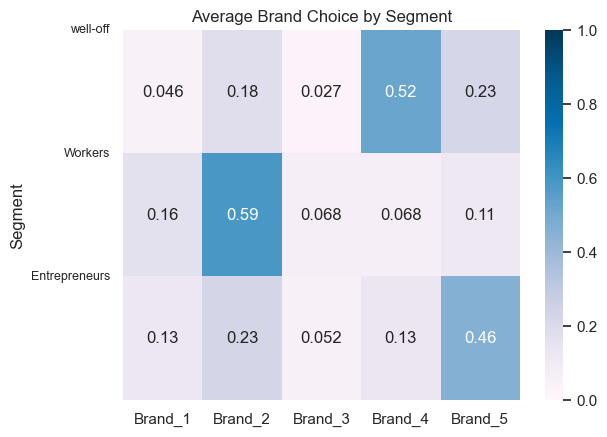

In [74]:
ssn.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2], ['well-off','Workers','Entrepreneurs'], rotation = 0, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

<h4>Comments on Analysis so far </h4>

> Entrepreneurs :   Prefer Brand_2 possible substitute Brand_1<br>
> well-off      :   Prefer Brand_5 possible substitute Brand_2 <br>
> Workers       :   Prefer Brand_4 possible substitute Brand_5 

possible substitute : SECOND Preference

### Revenue

In [75]:
df_purchase_predictors[['Price_1','Promotion_1']]

Price_1  Promotion_1
0         1.59            0
1         1.51            0
2         1.51            0
3         1.52            0
4         1.52            0
...        ...          ...
58688     1.41            0
58689     1.36            0
58690     1.50            0
58691     1.51            0
58692     1.51            0

[58693 rows x 2 columns]

In [76]:
#temp['Revenue Brand 1']

In [77]:
# Determine which Segment is respomsible for max Revenue for each brand

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

Segment  Revenue Brand 1
0        0           765.00
1        1          3720.73
2        2          1819.92

In [78]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

segments_brand_revenue

Segment  Revenue Brand 1  Revenue Brand 2  Revenue Brand 3  \
0        0           765.00          2213.12           723.84   
1        1          3720.73         15546.89          3775.28   
2        2          1819.92          4008.30          1522.40   

   Revenue Brand 4  Revenue Brand 5  
0         12529.32          7942.70  
1          2389.65          3541.54  
2          4121.13         18136.76

In [79]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

Segment  Revenue Brand 1  Revenue Brand 2  Revenue Brand 3  \
0        0           765.00          2213.12           723.84   
1        1          3720.73         15546.89          3775.28   
2        2          1819.92          4008.30          1522.40   

   Revenue Brand 4  Revenue Brand 5  Total Revenue  
0         12529.32          7942.70       24173.98  
1          2389.65          3541.54       28974.09  
2          4121.13         18136.76       29608.51

In [80]:
seg_prop

Segment_prop
Segment              
0               0.206
1               0.490
2               0.304

In [81]:
# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = seg_prop['Segment_prop']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({2:'Entrepreneurs',
                                                                           0:'well-off',
                                                                           1:'Workers'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

Revenue Brand 1  Revenue Brand 2  Revenue Brand 3  \
Segment                                                            
well-off                765.00          2213.12           723.84   
Workers                3720.73         15546.89          3775.28   
Entrepreneurs          1819.92          4008.30          1522.40   

               Revenue Brand 4  Revenue Brand 5  Total Revenue  \
Segment                                                          
well-off              12529.32          7942.70       24173.98   
Workers                2389.65          3541.54       28974.09   
Entrepreneurs          4121.13         18136.76       29608.51   

               Segment Proportions  
Segment                             
well-off                     0.206  
Workers                      0.490  
Entrepreneurs                0.304

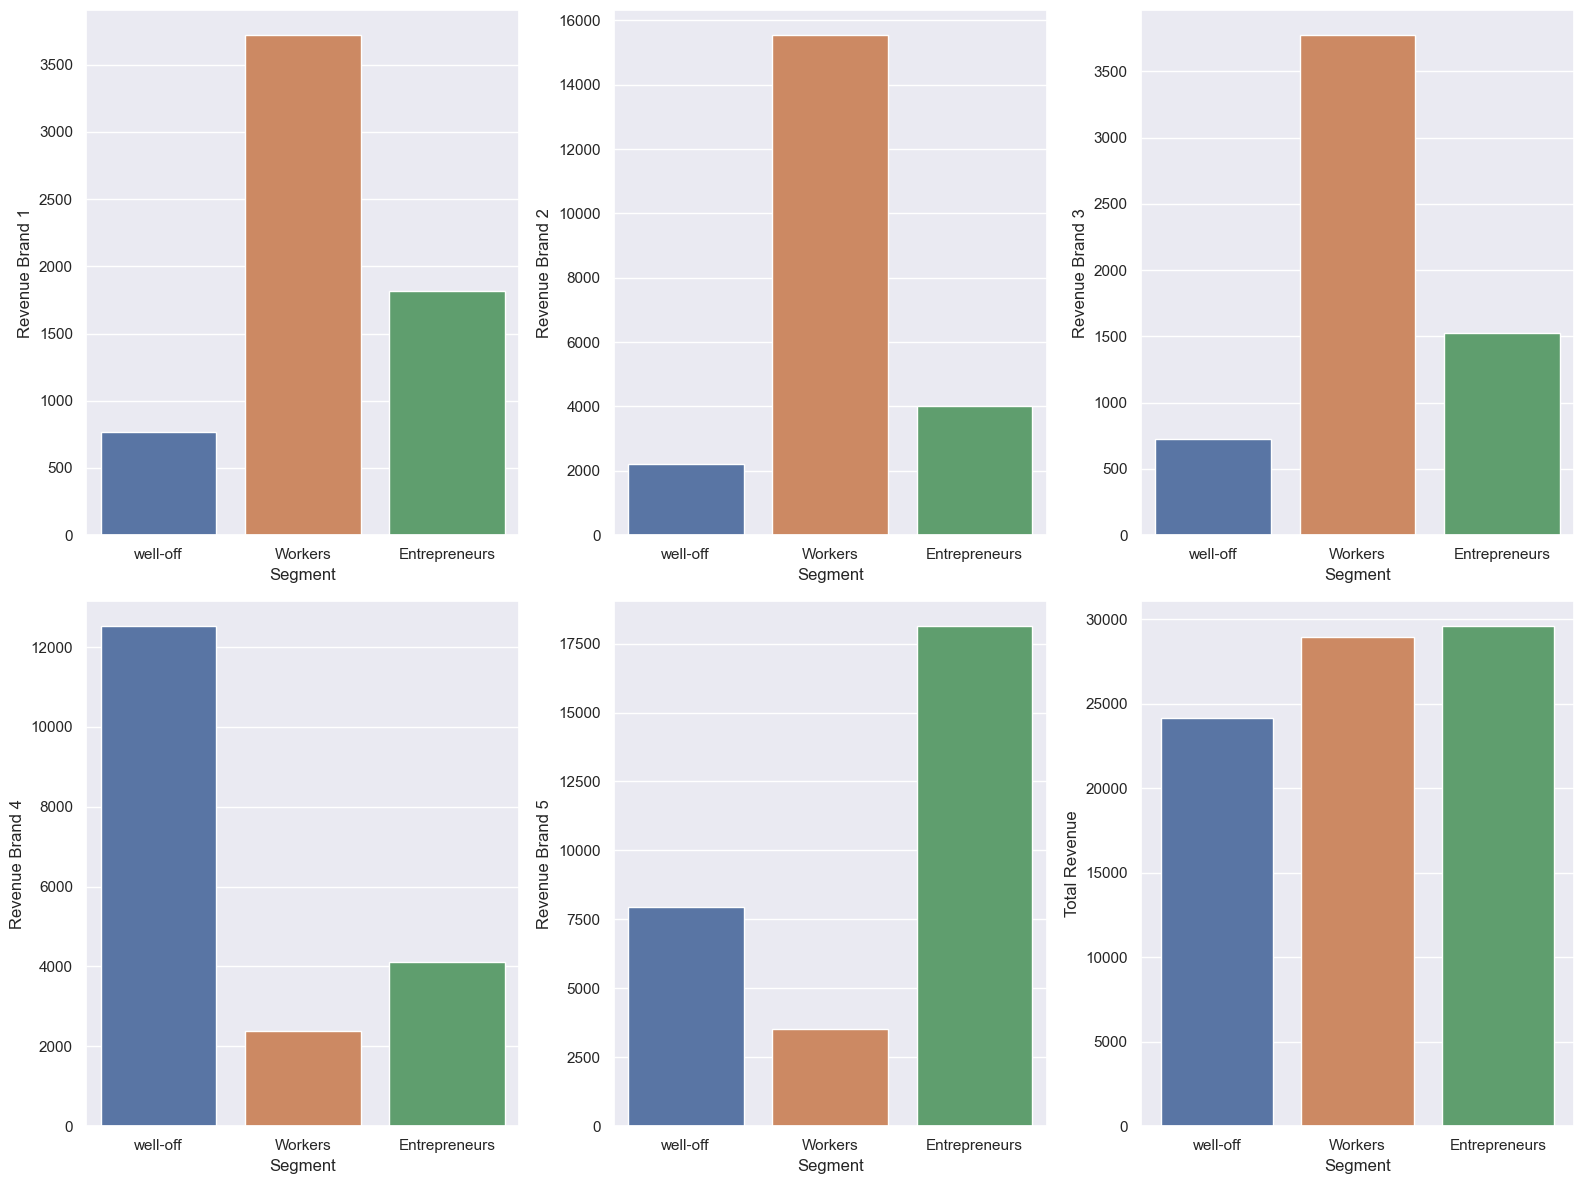

In [82]:
hue = segments_brand_revenue.index
fig, ax = plt.subplots(2,3,figsize=(16,12))
j = 0
k = 0
l = 0
columns = ["Revenue Brand 1","Revenue Brand 2","Revenue Brand 3","Revenue Brand 4","Revenue Brand 5","Total Revenue"]
for i in columns:
    if k<3:
        ssn.barplot(x = segments_brand_revenue.index, y = segments_brand_revenue[i], ax=ax[j][k])
        k+=1
    else:
        j = 1
        ssn.barplot(x = segments_brand_revenue.index, y = segments_brand_revenue[i], ax=ax[j][l])
        l+=1

fig.tight_layout()
plt.plot();

#### Comments on Analysis so far

> Each group accounts max Revenue for their preferred Brand

> Max Revenue proportion for Brand_1 and Brand_3 comes from Entrepreneurs group

> Well-off segment accounts for most overall revenue

## Purchase Probability Model

### Setup

In [83]:
df_purchase = pd.read_csv('purchase data.csv')

df_purchase_segm_scaled = df_purchase[['Sex', 'Marital status',
                                       'Age', 'Education', 'Income',
                                       'Occupation', 'Settlement size']]

In [84]:
temp = scalar.fit_transform(df_purchase_segm_scaled[["Age","Income"]])
df_purchase_segm_scaled[["Age","Income"]] = temp
df_purchase_segm_pca = pca.transform(df_purchase_segm_scaled)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predict = df_purchase.copy()
df_purchase_predict['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predict = pd.concat([df_purchase_predict, segment_dummies], axis = 1)

df_pa = df_purchase_predict
df_pa

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0      200000001    1          0      0         0               0   
1      200000001   11          0      0         0               0   
2      200000001   12          0      0         0               0   
3      200000001   16          0      0         0               0   
4      200000001   18          0      0         0               0   
...          ...  ...        ...    ...       ...             ...   
58688  200000500  703          0      0         0               2   
58689  200000500  710          0      0         0               0   
58690  200000500  717          0      0         0               0   
58691  200000500  722          1      2         3               0   
58692  200000500  726          0      0         0               2   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Marital status  Age  \
0                      0     1.59     1.87     2.01  ...               0   47   
1                      0     1.51     1.89     1.99  ...               0   47   
2                      0     1.51     1.89     1.99  ...               0   47   
3                      0     1.52     1.89     1.98  ...               0   47   
4                      0     1.52     1.89     1.99  ...               0   47   
...                  ...      ...      ...      ...  ...             ...  ...   
58688                  1     1.41     1.85     2.01  ...               0   42   
58689                  0     1.36     1.84     2.09  ...               0   42   
58690                  0     1.50     1.80     2.14  ...               0   42   
58691                  0     1.51     1.82     2.09  ...               0   42   
58692                  1     1.51     1.82     2.09  ...               0   42   

       Education  Income  Occupation  Settlement size  Segment  Segment_0  \
0              1  110866           1                0        1          0   
1              1  110866           1                0        1          0   
2              1  110866           1                0        1          0   
3              1  110866           1                0        1          0   
4              1  110866           1                0        1          0   
...          ...     ...         ...              ...      ...        ...   
58688          1  120946           1                0        1          0   
58689          1  120946           1                0        1          0   
58690          1  120946           1                0        1          0   
58691          1  120946           1                0        1          0   
58692          1  120946           1                0        1          0   

       Segment_1  Segment_2  
0              1          0  
1              1          0  
2              1          0  
3              1          0  
4              1          0  
...          ...        ...  
58688          1          0  
58689          1          0  
58690          1          0  
58691          1          0  
58692          1          0  

[58693 rows x 28 columns]

### Purchase Probability

In [85]:

y = df_pa['Incidence']

x = pd.DataFrame()
x['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(x,y)
model_purchase.coef_

array([[-2.34741471]])

### Price Elasticity of Purchase Probability

In [86]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

Price_1       Price_2       Price_3       Price_4       Price_5
count  58693.000000  58693.000000  58693.000000  58693.000000  58693.000000
mean       1.392074      1.780999      2.006789      2.159945      2.654798
std        0.091139      0.170868      0.046867      0.089825      0.098272
min        1.100000      1.260000      1.870000      1.760000      2.110000
25%        1.340000      1.580000      1.970000      2.120000      2.630000
50%        1.390000      1.880000      2.010000      2.170000      2.670000
75%        1.470000      1.890000      2.060000      2.240000      2.700000
max        1.590000      1.900000      2.140000      2.260000      2.800000

In [87]:
price_range = np.arange(0.5, 3.5, 0.01)
crit_val = -1*np.arange(0.01, 2, 0.1)/np.arange(0.01, 2, 0.1)
p_range = np.arange(0.01, 2, 0.1)

In [88]:
df_price_range = pd.DataFrame(price_range,columns=['Mean_Price'])

Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:, 1]
pe = model_purchase.coef_[0][0]* price_range * (1 - purchase_pr)

In [89]:
price_elasticity_df = pd.DataFrame()

price_elasticity_df["Price"] = price_range
price_elasticity_df["Elasticity"] = pe

price_elasticity_df.head(5)

Price  Elasticity
0   0.50   -0.096355
1   0.51   -0.100420
2   0.52   -0.104613
3   0.53   -0.108935
4   0.54   -0.113391

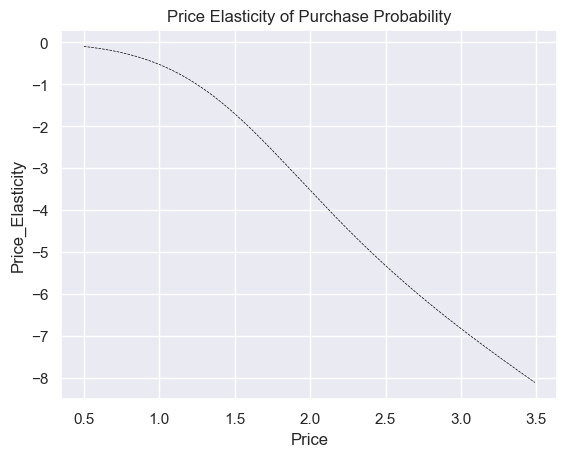

In [90]:

plt.plot(price_elasticity_df['Price'],
         price_elasticity_df['Elasticity'],
         color = "black",
         linestyle = '--',
         linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Price_Elasticity")
plt.title("Price Elasticity of Purchase Probability")

plt.show();

### Purchase Probability by segments

In [91]:
df_pa

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0      200000001    1          0      0         0               0   
1      200000001   11          0      0         0               0   
2      200000001   12          0      0         0               0   
3      200000001   16          0      0         0               0   
4      200000001   18          0      0         0               0   
...          ...  ...        ...    ...       ...             ...   
58688  200000500  703          0      0         0               2   
58689  200000500  710          0      0         0               0   
58690  200000500  717          0      0         0               0   
58691  200000500  722          1      2         3               0   
58692  200000500  726          0      0         0               2   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Marital status  Age  \
0                      0     1.59     1.87     2.01  ...               0   47   
1                      0     1.51     1.89     1.99  ...               0   47   
2                      0     1.51     1.89     1.99  ...               0   47   
3                      0     1.52     1.89     1.98  ...               0   47   
4                      0     1.52     1.89     1.99  ...               0   47   
...                  ...      ...      ...      ...  ...             ...  ...   
58688                  1     1.41     1.85     2.01  ...               0   42   
58689                  0     1.36     1.84     2.09  ...               0   42   
58690                  0     1.50     1.80     2.14  ...               0   42   
58691                  0     1.51     1.82     2.09  ...               0   42   
58692                  1     1.51     1.82     2.09  ...               0   42   

       Education  Income  Occupation  Settlement size  Segment  Segment_0  \
0              1  110866           1                0        1          0   
1              1  110866           1                0        1          0   
2              1  110866           1                0        1          0   
3              1  110866           1                0        1          0   
4              1  110866           1                0        1          0   
...          ...     ...         ...              ...      ...        ...   
58688          1  120946           1                0        1          0   
58689          1  120946           1                0        1          0   
58690          1  120946           1                0        1          0   
58691          1  120946           1                0        1          0   
58692          1  120946           1                0        1          0   

       Segment_1  Segment_2  
0              1          0  
1              1          0  
2              1          0  
3              1          0  
4              1          0  
...          ...        ...  
58688          1          0  
58689          1          0  
58690          1          0  
58691          1          0  
58692          1          0  

[58693 rows x 28 columns]

In [92]:
seg = ["Segment_0","Segment_1","Segment_2"]
elasticity = pd.DataFrame()
critical_val = pd.DataFrame()

for i in range(len(seg)):
    df_seg = df_pa[df_pa['Segment'] == i]
    y = df_seg['Incidence']

    x = pd.DataFrame()
    x['Mean_Price'] = (df_seg['Price_1'] +
                       df_seg['Price_2'] +
                       df_seg['Price_3'] +
                       df_seg['Price_4'] +
                       df_seg['Price_5'] ) / 5

    model_purchase = LogisticRegression(solver = 'sag')
    model_purchase.fit(x,y)

    Y_pr = model_purchase.predict_proba(df_price_range)
    
    purchase_pr = Y_pr[:, 1]
    pe = model_purchase.coef_[:,0]* price_range * (1 - purchase_pr)

    elasticity[seg[i]] = pe

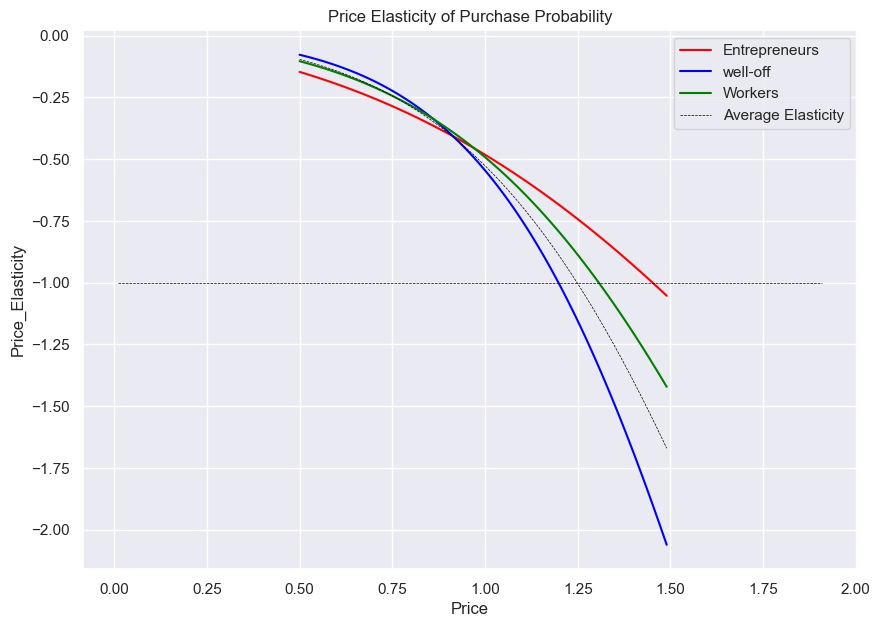

In [93]:
price_range = np.arange(0.5, 1.5, 0.01)
plt.figure(figsize=(10,7))
plt.plot(price_range,elasticity[seg[0]][:100], 
         color = "red")

plt.plot(price_range,elasticity[seg[1]][:100], 
         color = "blue")
plt.plot(price_range,elasticity[seg[2]][:100], 
         color = "green")

plt.plot(price_range,
         price_elasticity_df['Elasticity'][:100],
         color = "black",
         linestyle = '--',
         linewidth=0.5)
plt.plot(p_range,crit_val,color = "black",
         linestyle = '--',
         linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Price_Elasticity")
plt.title("Price Elasticity of Purchase Probability")
plt.legend(['Entrepreneurs','well-off','Workers',"Average Elasticity"], loc ="upper right")

plt.show();

In [94]:
elasticity

Segment_0  Segment_1  Segment_2
0    -0.146909  -0.077489  -0.103545
1    -0.151470  -0.081181  -0.107592
2    -0.156109  -0.085012  -0.111750
3    -0.160824  -0.088987  -0.116021
4    -0.165618  -0.093111  -0.120408
..         ...        ...        ...
295  -4.452277  -9.727244  -6.974636
296  -4.468846  -9.756544  -6.997708
297  -4.485392  -9.785820  -7.020740
298  -4.501914  -9.815073  -7.043733
299  -4.518414  -9.844302  -7.066688

[300 rows x 3 columns]

#### Comments on Analysis so far
>
> Purchase Probability of Entrepreneurs is most sensitive to price
>

###  Purchase Probability with Promotion Feature

In [95]:
price_range = np.arange(0.5, 3.5, 0.01)
y = df_pa['Incidence']

x = pd.DataFrame()
x['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

x['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5

model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(x,y)
model_purchase.coef_

array([[-1.4939779 ,  0.56148109]])

In [96]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})
df_price_elasticity_promotion["Mean_Promotion"] = 1
df_price_elasticity_promotion

Price_Range  Mean_Promotion
0           0.50               1
1           0.51               1
2           0.52               1
3           0.53               1
4           0.54               1
..           ...             ...
295         3.45               1
296         3.46               1
297         3.47               1
298         3.48               1
299         3.49               1

[300 rows x 2 columns]

In [97]:
y_promo = model_purchase.predict_proba(df_price_elasticity_promotion)
promo = y_promo[:, 1]
promo

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Price_Range
Feature names seen at fit time, yet now missing:
- Mean_Price


In [ ]:
model_purchase.coef_[:, 0],y_promo[:, 1]

In [ ]:
price_elasticity_promo = (model_purchase.coef_[:, 0] * price_range) * (1 - promo)
price_elasticity_promo

In [ ]:
elasticity['Elasticity_Promotion_1'] = price_elasticity_promo
elasticity.head()

### Price Elasticity without Promotion

In [98]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

df_price_elasticity_promotion_no['Promotion'] = 0

Y_no_promo = model_purchase.predict_proba(df_price_elasticity_promotion_no)

no_promo = Y_no_promo[: , 1]

price_elasticity_no_promo = model_purchase.coef_[:, 0] * price_range *(1- no_promo)

elasticity['Elasticity_no_Promotion'] = price_elasticity_no_promo


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion


In [99]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

NameError: name 'price_elasticity_no_promo' is not defined

<Figure size 900x600 with 0 Axes>

> Inelastic Price Range increases with Promotion

## Brand Choice

In [100]:
# Brand = 0 or Incidence = 0 implies no purchase

brand_choice = df_pa[df_pa['Incidence'] == 1]
brand_choice_1 = brand_choice #df_pa[df_pa['Brand'] != 0]
brand_choice_1

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
6      200000001   28          1      2         2               0   
11     200000001   58          1      5         1               0   
19     200000001  110          1      1         2               0   
24     200000001  142          1      4         1               0   
29     200000001  183          1      2         3               0   
...          ...  ...        ...    ...       ...             ...   
58621  200000500  296          1      2         6               0   
58648  200000500  460          1      1        12               0   
58674  200000500  641          1      2         7               0   
58687  200000500  697          1      2         6               0   
58691  200000500  722          1      2         3               0   

       Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Marital status  Age  \
6                      0     1.50     1.90     1.99  ...               0   47   
11                     0     1.39     1.90     1.91  ...               0   47   
19                     0     1.47     1.90     1.99  ...               0   47   
24                     0     1.21     1.35     1.99  ...               0   47   
29                     0     1.46     1.88     1.97  ...               0   47   
...                  ...      ...      ...      ...  ...             ...  ...   
58621                  0     1.48     1.89     2.01  ...               0   42   
58648                  0     1.35     1.57     2.02  ...               0   42   
58674                  0     1.50     1.85     2.06  ...               0   42   
58687                  0     1.42     1.51     1.97  ...               0   42   
58691                  0     1.51     1.82     2.09  ...               0   42   

       Education  Income  Occupation  Settlement size  Segment  Segment_0  \
6              1  110866           1                0        1          0   
11             1  110866           1                0        1          0   
19             1  110866           1                0        1          0   
24             1  110866           1                0        1          0   
29             1  110866           1                0        1          0   
...          ...     ...         ...              ...      ...        ...   
58621          1  120946           1                0        1          0   
58648          1  120946           1                0        1          0   
58674          1  120946           1                0        1          0   
58687          1  120946           1                0        1          0   
58691          1  120946           1                0        1          0   

       Segment_1  Segment_2  
6              1          0  
11             1          0  
19             1          0  
24             1          0  
29             1          0  
...          ...        ...  
58621          1          0  
58648          1          0  
58674          1          0  
58687          1          0  
58691          1          0  

[14638 rows x 28 columns]

> At this point customer is inside store and has an intent to buy this product now based on pricies alone which Brand would a customer choose.

In [101]:
y = brand_choice['Brand']

prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']

x = brand_choice[prices]

In [102]:
brand_choice['Brand'].unique()

array([2, 5, 1, 4, 3], dtype=int64)

In [103]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial', random_state=10)
model_brand_choice.fit(x,y)

LogisticRegression(multi_class='multinomial', random_state=10, solver='sag')

In [104]:
model_brand_choice.coef_

array([[-3.91593876,  0.6584674 ,  2.41779278,  0.70409959, -0.20208666],
       [ 1.27461497, -1.87985355, -0.21263828, -0.20633744,  0.58787283],
       [ 1.62416098,  0.56209549,  0.50079031,  1.03948252,  0.45275703],
       [ 0.5745399 ,  0.39559015, -1.40060096, -1.24624038,  0.24935327],
       [ 0.44262292,  0.2637005 , -1.30534385, -0.29100429, -1.08789647]])

In [105]:
x =model_brand_choice.predict_proba(x)[:5]

In [106]:
a=0
for i in range(5):
    a+=x[0][i]
print(a)

1.0


In [107]:
brand_coef = pd.DataFrame(model_brand_choice.coef_)
brand_coef.columns = ['Coeff1','Coeff2','Coeff3','Coeff4','Coeff5']
brand_coef.index = ['Price1','Price2','Price3','Price4','Price5']
brand_coef

Coeff1    Coeff2    Coeff3    Coeff4    Coeff5
Price1 -3.915939  0.658467  2.417793  0.704100 -0.202087
Price2  1.274615 -1.879854 -0.212638 -0.206337  0.587873
Price3  1.624161  0.562095  0.500790  1.039483  0.452757
Price4  0.574540  0.395590 -1.400601 -1.246240  0.249353
Price5  0.442623  0.263701 -1.305344 -0.291004 -1.087896

In [108]:
brand_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
brand_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
brand_coef.index = [prices]
brand_coef = brand_coef.round(2)
brand_coef

Coef_Brand_1 Coef_Brand_2 Coef_Brand_3 Coef_Brand_4 Coef_Brand_5
Price_1        -3.92         1.27         1.62         0.57         0.44
Price_2         0.66        -1.88         0.56         0.40         0.26
Price_3         2.42        -0.21         0.50        -1.40        -1.31
Price_4         0.70        -0.21         1.04        -1.25        -0.29
Price_5        -0.20         0.59         0.45         0.25        -1.09

## Brand own Price Elasticity

In [109]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

Price_1   Price_2   Price_3   Price_4  Price_5
0    1.384559  1.764717  2.006694  2.159658     0.50
1    1.384559  1.764717  2.006694  2.159658     0.51
2    1.384559  1.764717  2.006694  2.159658     0.52
3    1.384559  1.764717  2.006694  2.159658     0.53
4    1.384559  1.764717  2.006694  2.159658     0.54
..        ...       ...       ...       ...      ...
295  1.384559  1.764717  2.006694  2.159658     3.45
296  1.384559  1.764717  2.006694  2.159658     3.46
297  1.384559  1.764717  2.006694  2.159658     3.47
298  1.384559  1.764717  2.006694  2.159658     3.48
299  1.384559  1.764717  2.006694  2.159658     3.49

[300 rows x 5 columns]

In [110]:
pred_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
pred_brand_5

array([[0.03290574, 0.0217765 , 0.00543859, 0.02988812, 0.90999104],
       [0.03316046, 0.02211912, 0.0055167 , 0.03025577, 0.90894795],
       [0.03341668, 0.0224668 , 0.00559585, 0.0306275 , 0.90789316],
       ...,
       [0.0688156 , 0.47570337, 0.0795344 , 0.23889429, 0.13705234],
       [0.06853   , 0.47748618, 0.07972468, 0.23897924, 0.1352799 ],
       [0.06824345, 0.47926069, 0.07991292, 0.23905674, 0.1335262 ]])

In [111]:
prb_own_brand_5 = pred_brand_5[:, 4]
prb_own_brand_5

array([0.90999104, 0.90894795, 0.90789316, 0.90682657, 0.90574805,
       0.90465751, 0.90355482, 0.90243988, 0.90131257, 0.90017278,
       0.8990204 , 0.89785532, 0.89667741, 0.89548658, 0.8942827 ,
       0.89306566, 0.89183534, 0.89059164, 0.88933444, 0.88806362,
       0.88677908, 0.88548068, 0.88416834, 0.88284191, 0.88150131,
       0.8801464 , 0.87877708, 0.87739324, 0.87599475, 0.87458152,
       0.87315342, 0.87171034, 0.87025218, 0.86877881, 0.86729014,
       0.86578604, 0.86426642, 0.86273116, 0.86118015, 0.85961329,
       0.85803047, 0.85643159, 0.85481653, 0.85318519, 0.85153748,
       0.84987329, 0.84819252, 0.84649506, 0.84478083, 0.84304971,
       0.84130163, 0.83953648, 0.83775416, 0.83595459, 0.83413768,
       0.83230333, 0.83045147, 0.828582  , 0.82669484, 0.82478991,
       0.82286713, 0.82092643, 0.81896771, 0.81699092, 0.81499599,
       0.81298283, 0.81095139, 0.80890159, 0.80683339, 0.80474671,
       0.8026415 , 0.8005177 , 0.79837528, 0.79621416, 0.79403

In [112]:
brand_coef

Coef_Brand_1 Coef_Brand_2 Coef_Brand_3 Coef_Brand_4 Coef_Brand_5
Price_1        -3.92         1.27         1.62         0.57         0.44
Price_2         0.66        -1.88         0.56         0.40         0.26
Price_3         2.42        -0.21         0.50        -1.40        -1.31
Price_4         0.70        -0.21         1.04        -1.25        -0.29
Price_5        -0.20         0.59         0.45         0.25        -1.09

In [113]:
beta_5 = brand_coef.iloc[4, 4]
beta_5

-1.09

> `Elasticity = Beta x Price x (1-PriceProbability)`

In [114]:
own_price_elasticity_brand_5 = beta_5 * price_range * (1 - prb_own_brand_5)

elasticity['Brand_5'] = own_price_elasticity_brand_5
elasticity

Segment_0  Segment_1  Segment_2   Brand_5
0    -0.146909  -0.077489  -0.103545 -0.049055
1    -0.151470  -0.081181  -0.107592 -0.050616
2    -0.156109  -0.085012  -0.111750 -0.052206
3    -0.160824  -0.088987  -0.116021 -0.053826
4    -0.165618  -0.093111  -0.120408 -0.055477
..         ...        ...        ...       ...
295  -4.452277  -9.727244  -6.974636 -3.231571
296  -4.468846  -9.756544  -6.997708 -3.247765
297  -4.485392  -9.785820  -7.020740 -3.263927
298  -4.501914  -9.815073  -7.043733 -3.280056
299  -4.518414  -9.844302  -7.066688 -3.296153

[300 rows x 4 columns]

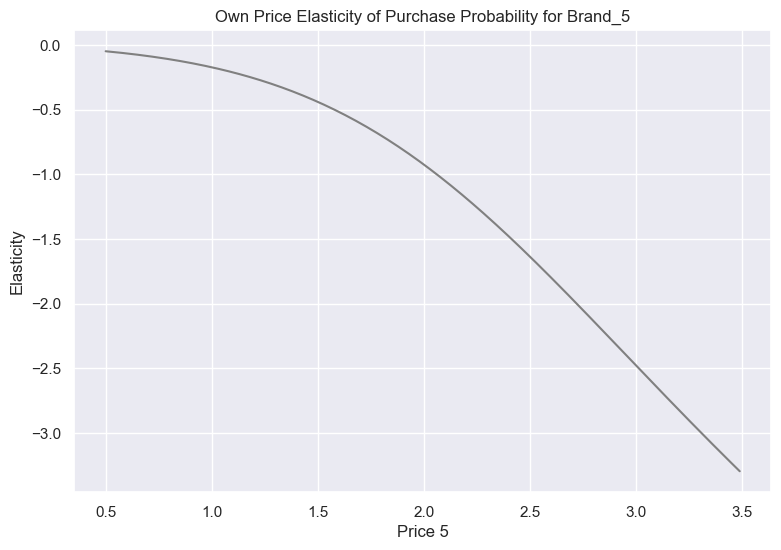

In [115]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand_5');

In [116]:
temp1 = pd.DataFrame(index = np.arange(price_range.size))
temp1['Price_1'] = price_range
temp1['Price_2'] = brand_choice['Price_2'].mean()
temp1['Price_3'] = brand_choice['Price_3'].mean()
temp1['Price_4'] = brand_choice['Price_4'].mean()
temp1['Price_5'] = brand_choice['Price_5'].mean()

temp2 = pd.DataFrame(index = np.arange(price_range.size))
temp2['Price_1'] = brand_choice['Price_1'].mean()
temp2['Price_2'] = price_range
temp2['Price_3'] = brand_choice['Price_3'].mean()
temp2['Price_4'] = brand_choice['Price_4'].mean()
temp2['Price_5'] = brand_choice['Price_5'].mean()

temp3 = pd.DataFrame(index = np.arange(price_range.size))
temp3['Price_1'] = brand_choice['Price_1'].mean()
temp3['Price_2'] = brand_choice['Price_2'].mean()
temp3['Price_3'] = price_range
temp3['Price_4'] = brand_choice['Price_4'].mean()
temp3['Price_5'] = brand_choice['Price_5'].mean()

temp4 = pd.DataFrame(index = np.arange(price_range.size))
temp4['Price_1'] = brand_choice['Price_1'].mean()
temp4['Price_2'] = brand_choice['Price_2'].mean()
temp4['Price_3'] = brand_choice['Price_3'].mean()
temp4['Price_4'] = price_range
temp4['Price_5'] = brand_choice['Price_5'].mean()

pred_brand_1 = model_brand_choice.predict_proba(temp1)
pred_brand_2 = model_brand_choice.predict_proba(temp2)
pred_brand_3 = model_brand_choice.predict_proba(temp3)
pred_brand_4 = model_brand_choice.predict_proba(temp4)

prb_own_brand_1 = pred_brand_1[:, 0]
prb_own_brand_2 = pred_brand_2[:, 1]
prb_own_brand_3 = pred_brand_3[:, 2]
prb_own_brand_4 = pred_brand_4[:, 3]

beta_1 = brand_coef.iloc[0, 0]
beta_2 = brand_coef.iloc[1, 1]
beta_3 = brand_coef.iloc[2, 2]
beta_4 = brand_coef.iloc[3, 3]

own_price_elasticity_brand_1 = beta_1 * price_range * (1 - prb_own_brand_1)
own_price_elasticity_brand_2 = beta_2 * price_range * (1 - prb_own_brand_2)
own_price_elasticity_brand_3 = beta_3 * price_range * (1 - prb_own_brand_3)
own_price_elasticity_brand_4 = beta_4 * price_range * (1 - prb_own_brand_4)

elasticity['Brand_1'] = own_price_elasticity_brand_1
elasticity['Brand_2'] = own_price_elasticity_brand_2
elasticity['Brand_3'] = own_price_elasticity_brand_3
elasticity['Brand_4'] = own_price_elasticity_brand_4

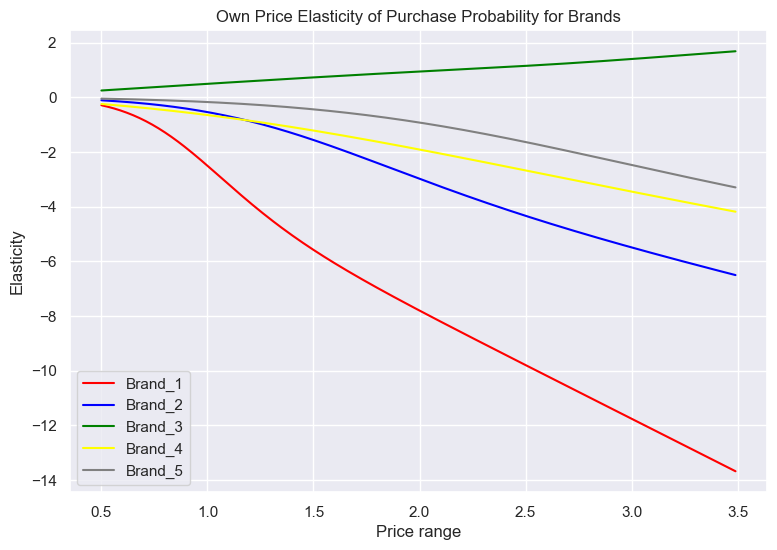

In [117]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_1, color = 'red')
plt.plot(price_range, own_price_elasticity_brand_2, color = 'blue')
plt.plot(price_range, own_price_elasticity_brand_3, color = 'green')
plt.plot(price_range, own_price_elasticity_brand_4, color = 'yellow')
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price range')
plt.ylabel('Elasticity')
plt.legend(['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5'])
plt.title('Own Price Elasticity of Purchase Probability for Brands');

> As expected, cheaper Brands tend to have higher sensitivity towards price change.

## Brand Elasticity by Segment

### Entrepreneurs Segment

In [118]:
temp = df_pa[df_pa['Incidence'] == 1]
brand_choice1 = temp[temp['Segment'] == 0]
brand_choice=brand_choice1
#brand_choice1 = pd.get_dummies(brand_choice, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_choice1.head(5)

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
101  200000002    6          1      4         1               0   
115  200000002  100          1      4         2               0   
138  200000002  283          1      4         3               0   
141  200000002  307          1      4         1               0   
153  200000002  422          1      4         1               0   

     Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Marital status  Age  \
101                  0     1.59     1.87     2.01  ...               1   52   
115                  0     1.47     1.90     1.95  ...               1   52   
138                  0     1.37     1.89     2.00  ...               1   52   
141                  0     1.34     1.89     2.01  ...               1   52   
153                  0     1.34     1.89     2.02  ...               1   52   

     Education  Income  Occupation  Settlement size  Segment  Segment_0  \
101          2  159052           2                1        0          1   
115          2  159052           2                1        0          1   
138          2  159052           2                1        0          1   
141          2  159052           2                1        0          1   
153          2  159052           2                1        0          1   

     Segment_1  Segment_2  
101          0          0  
115          0          0  
138          0          0  
141          0          0  
153          0          0  

[5 rows x 28 columns]

In [119]:
# model estimation
y = brand_choice['Brand']
x = brand_choice[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]

model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice.fit(x,y)

LogisticRegression(max_iter=300, multi_class='multinomial', solver='sag')

In [120]:
y.unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [121]:
coefficients = ['Coeff1','Coeff2','Coeff3','Coeff4','Coeff5']
prices = ['Price1','Price2','Price3','Price4','Price5']

In [122]:
#coefficients table for segment
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

Coeff1 Coeff2 Coeff3 Coeff4 Coeff5
Price1  -2.14   1.06   0.74   0.30   0.04
Price2  -0.97  -1.36   1.17   0.74   0.43
Price3   1.86  -1.24  -0.23  -0.22  -0.17
Price4   2.65   0.61  -0.30  -1.73  -1.23
Price5  -0.97   0.06   1.03   0.40  -0.53

In [123]:
bc_coef.iat[1,1]

-1.36

#### Brand_1

In [124]:
# Own Price Elasticity
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = price_range
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()


In [125]:
predict_own_brand1s0 = model_brand_choice.predict_proba(df_own_brand)
predict_own_brand1s0

array([[2.42280973e-01, 3.90123790e-02, 1.29234735e-02, 4.00705734e-01,
        3.05077440e-01],
       [2.37930491e-01, 3.95582616e-02, 1.30627885e-02, 4.03247755e-01,
        3.06200704e-01],
       [2.33633008e-01, 4.01074700e-02, 1.32021858e-02, 4.05762274e-01,
        3.07295063e-01],
       ...,
       [1.78021818e-04, 3.86220944e-01, 4.98551156e-02, 4.18615647e-01,
        1.45130272e-01],
       [1.73243749e-04, 3.88082566e-01, 4.99367088e-02, 4.17460518e-01,
        1.44346963e-01],
       [1.68591116e-04, 3.89946669e-01, 5.00176028e-02, 4.16301646e-01,
        1.43565491e-01]])

In [126]:
pr_own_brand = predict_own_brand1s0[: , 0]
own_price_elasticity_brand =  bc_coef.iat[0,0]*price_range*(1 - pr_own_brand)
elasticity['Brand 1_S0'] = own_price_elasticity_brand

#### Brand_2

In [127]:
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = price_range
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand2s0 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand2s0[: , 1]
own_price_elasticity_brand =  bc_coef.iat[1,1]*price_range*(1 - pr_own_brand)
elasticity['Brand 2_S0'] = own_price_elasticity_brand

#### Brand 3

In [128]:
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = price_range
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand3s0 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand3s0[: , 2]
own_price_elasticity_brand =  bc_coef.iat[2,2]*price_range*(1 - pr_own_brand)
elasticity['Brand 3_S0'] = own_price_elasticity_brand

#### Brand 4

In [129]:
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = price_range
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand4s0 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand4s0[: , 3]
own_price_elasticity_brand =  bc_coef.iat[3,3]*price_range*(1 - pr_own_brand)
elasticity['Brand 4_S0'] = own_price_elasticity_brand

#### Brand 5

In [130]:
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = price_range

predict_own_brand5s0 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand5s0[: , 4]
own_price_elasticity_brand =  bc_coef.iat[4,4]*price_range*(1 - pr_own_brand)
elasticity['Brand 5_S0'] = own_price_elasticity_brand

### Worker Segement

In [131]:
# Incidence =1 implies that Purchase has occured

temp = df_pa[df_pa['Incidence'] == 1]
brand_choice = temp[temp['Segment'] == 1]
brand_choice1 = pd.get_dummies(brand_choice, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')


# model estimation
y = brand_choice['Brand']
x = brand_choice[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]

model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice.fit(x,y)

#coefficients table for segment
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

# Brand 1
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = price_range
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand1s1 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand1s1[: , 0]
own_price_elasticity_brand =  bc_coef.iat[0,0]*price_range*(1 - pr_own_brand)
elasticity['Brand 1_S1'] = own_price_elasticity_brand
elasticity

# Brand 2
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = price_range
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand2s1 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand2s1[: , 1]
own_price_elasticity_brand =  bc_coef.iat[1,1]*price_range*(1 - pr_own_brand)
elasticity['Brand 2_S1'] = own_price_elasticity_brand
elasticity


# Brand 3
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = price_range
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand3s1 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand3s1[: , 2]
own_price_elasticity_brand =  bc_coef.iat[2,2]*price_range*(1 - pr_own_brand)
elasticity['Brand 3_S1'] = own_price_elasticity_brand

# Brand 4
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = price_range
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand4s1 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand4s1[: , 3]
own_price_elasticity_brand =  bc_coef.iat[3,3]*price_range*(1 - pr_own_brand)
elasticity['Brand 4_S1'] = own_price_elasticity_brand

# Brand 5
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = price_range

predict_own_brand5s1 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand5s1[: , 4]
own_price_elasticity_brand =  bc_coef.iat[4,4]*price_range*(1 - pr_own_brand)
elasticity['Brand 5_S1'] = own_price_elasticity_brand

### Entreprenure Segment

In [132]:
# Incidence =1 implies that Purchase has occured

temp = df_pa[df_pa['Incidence'] == 1]
brand_choice = temp[temp['Segment'] == 2]
brand_choice1 = pd.get_dummies(brand_choice, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')


# model estimation
y = brand_choice['Brand']
x = brand_choice[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]

model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice.fit(x,y)

#coefficients table for segment
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

# Brand 1
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = price_range
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand1s2 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand1s2[: , 0]
own_price_elasticity_brand =  bc_coef.iat[0,0]*price_range*(1 - pr_own_brand)
elasticity['Brand 1_S2'] = own_price_elasticity_brand
elasticity

# Brand 2
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = price_range
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand2s2 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand2s2[: , 1]
own_price_elasticity_brand =  bc_coef.iat[1,1]*price_range*(1 - pr_own_brand)
elasticity['Brand 2_S2'] = own_price_elasticity_brand
elasticity


# Brand 3
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = price_range
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand3s2 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand3s2[: , 2]
own_price_elasticity_brand =  bc_coef.iat[2,2]*price_range*(1 - pr_own_brand)
elasticity['Brand 3_S2'] = own_price_elasticity_brand

# Brand 4
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = price_range
df_own_brand['Price_5'] = brand_choice['Price_5'].mean()

predict_own_brand4s2 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand4s2[: , 3]
own_price_elasticity_brand =  bc_coef.iat[3,3]*price_range*(1 - pr_own_brand)
elasticity['Brand 4_S2'] = own_price_elasticity_brand

# Brand 5
df_own_brand = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand['Price_5'] = price_range

predict_own_brand5s2 = model_brand_choice.predict_proba(df_own_brand)

pr_own_brand = predict_own_brand5s2[: , 4]
own_price_elasticity_brand =  bc_coef.iat[4,4]*price_range*(1 - pr_own_brand)
elasticity['Brand 5_S2'] = own_price_elasticity_brand

### Plots for Each Segment

#### Well-Off Segment

In [133]:
crit_val = -1*price_range/price_range

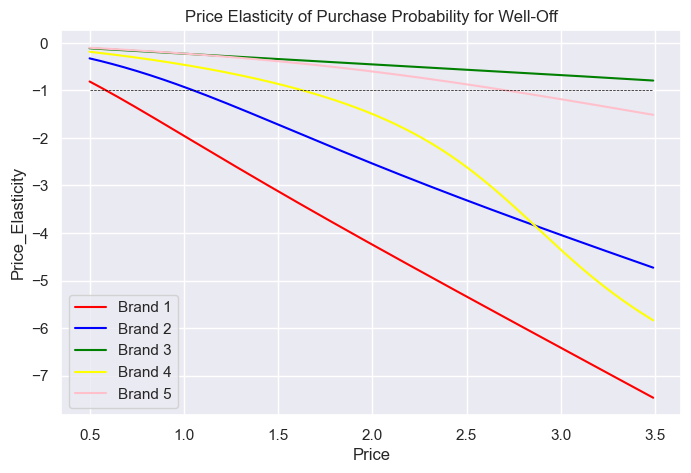

In [134]:
plt.figure(figsize=(8,5))
plt.plot(price_range,elasticity['Brand 1_S0'], 
         color = "red")

plt.plot(price_range,elasticity['Brand 2_S0'], 
         color = "blue")

plt.plot(price_range,elasticity['Brand 3_S0'], 
         color = "green")

plt.plot(price_range,elasticity['Brand 4_S0'], 
         color = "yellow")

plt.plot(price_range,elasticity['Brand 5_S0'], 
         color = "pink")

plt.plot(price_range,crit_val,color = "black",
         linestyle = '--',
         linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Price_Elasticity")
plt.title("Price Elasticity of Purchase Probability for Well-Off")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="lower left")

plt.show();

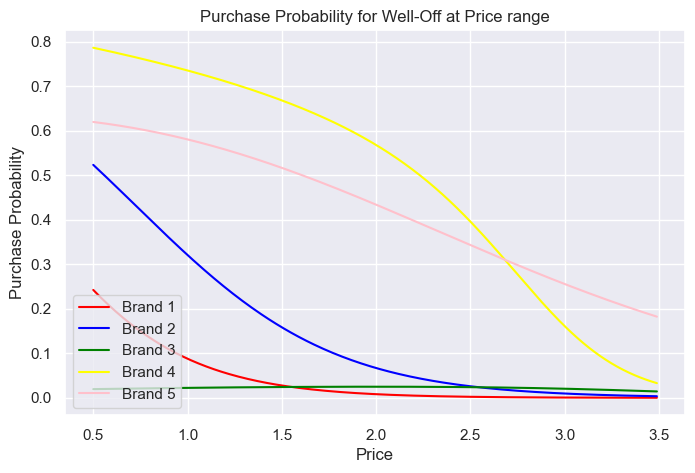

In [135]:
plt.figure(figsize=(8,5))
plt.plot(price_range,predict_own_brand1s0[: , 0], 
         color = "red")

plt.plot(price_range,predict_own_brand2s0[: , 1], 
         color = "blue")

plt.plot(price_range,predict_own_brand3s0[: , 2], 
         color = "green")

plt.plot(price_range,predict_own_brand4s0[: , 3], 
         color = "yellow")

plt.plot(price_range,predict_own_brand5s0[: , 4], 
         color = "pink")

#plt.plot(price_range,crit_val,color = "black",
 #        linestyle = '--',
  #       linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability for Well-Off at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="lower left")

plt.show();

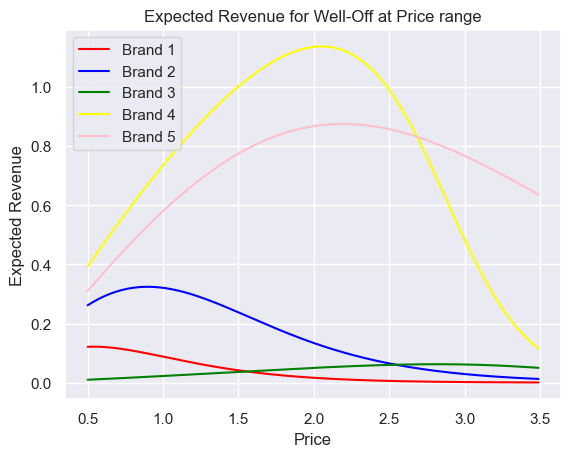

In [136]:
color = ['red','blue','green','yellow','pink']
predict = [predict_own_brand1s0,predict_own_brand2s0,predict_own_brand3s0,predict_own_brand4s0,predict_own_brand5s0]
for i in range(5):
    exp_revenue = predict[i][: , i]*price_range
    plt.plot(price_range,exp_revenue, 
             color = color[i])

plt.xlabel("Price")
plt.ylabel("Expected Revenue")
plt.title("Expected Revenue for Well-Off at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="upper left")
plt.show();

#### Worker Segment

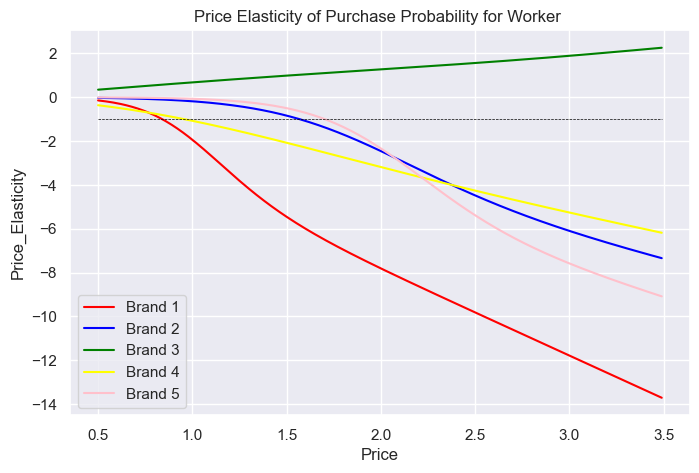

In [137]:
plt.figure(figsize=(8,5))
plt.plot(price_range,elasticity['Brand 1_S1'], 
         color = "red")

plt.plot(price_range,elasticity['Brand 2_S1'], 
         color = "blue")

plt.plot(price_range,elasticity['Brand 3_S1'], 
         color = "green")

plt.plot(price_range,elasticity['Brand 4_S1'], 
         color = "yellow")

plt.plot(price_range,elasticity['Brand 5_S1'], 
         color = "pink")

plt.plot(price_range,crit_val,color = "black",
         linestyle = '--',
         linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Price_Elasticity")
plt.title("Price Elasticity of Purchase Probability for Worker ")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="lower left")

plt.show();

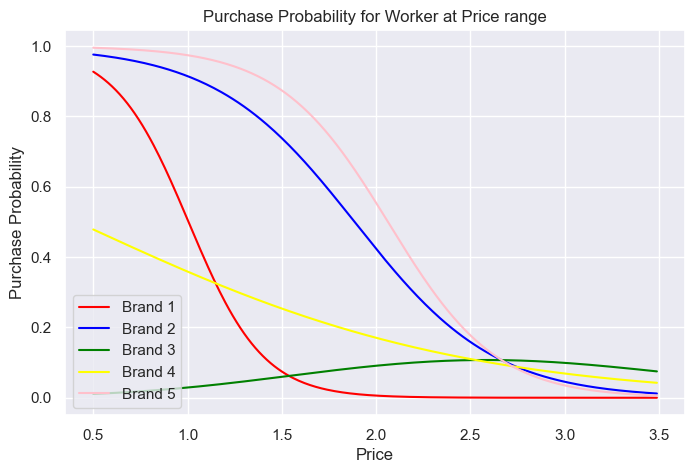

In [138]:
plt.figure(figsize=(8,5))
plt.plot(price_range,predict_own_brand1s1[: , 0], 
         color = "red")

plt.plot(price_range,predict_own_brand2s1[: , 1], 
         color = "blue")

plt.plot(price_range,predict_own_brand3s1[: , 2], 
         color = "green")

plt.plot(price_range,predict_own_brand4s2[: , 3], 
         color = "yellow")

plt.plot(price_range,predict_own_brand5s1[: , 4], 
         color = "pink")

#plt.plot(price_range,crit_val,color = "black",
 #        linestyle = '--',
  #       linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability for Worker at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="lower left")

plt.show();

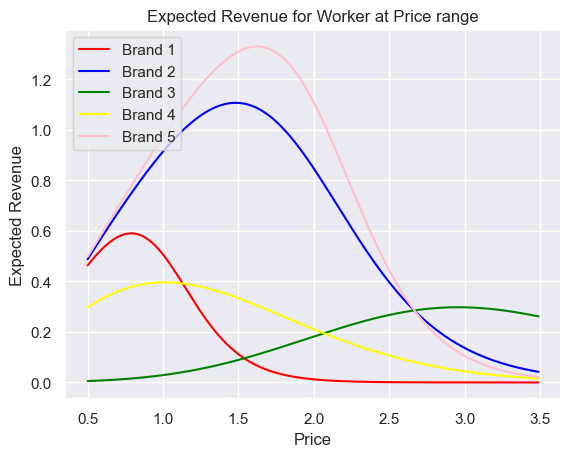

In [139]:
color = ['red','blue','green','yellow','pink']
predict = [predict_own_brand1s1,predict_own_brand2s1,predict_own_brand3s1,predict_own_brand4s1,predict_own_brand5s1]
for i in range(5):
    exp_revenue = predict[i][: , i]*price_range
    plt.plot(price_range,exp_revenue, 
             color = color[i])


plt.xlabel("Price")
plt.ylabel("Expected Revenue")
plt.title("Expected Revenue for Worker at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="upper left")
plt.show();

#### Entreprenure Segment

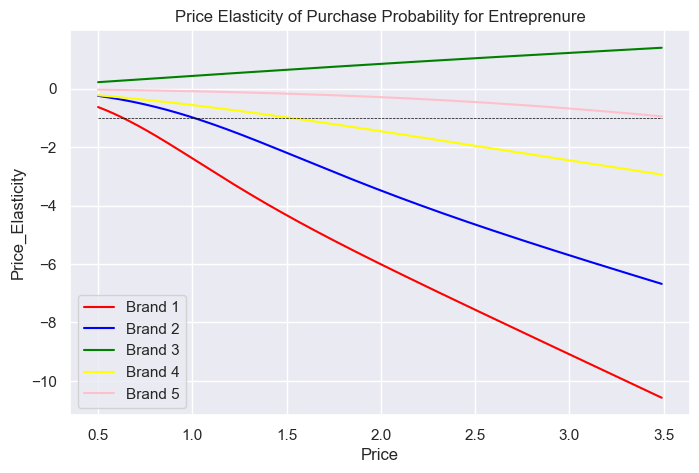

In [140]:
plt.figure(figsize=(8,5))
plt.plot(price_range,elasticity['Brand 1_S2'], 
         color = "red")

plt.plot(price_range,elasticity['Brand 2_S2'], 
         color = "blue")

plt.plot(price_range,elasticity['Brand 3_S2'], 
         color = "green")

plt.plot(price_range,elasticity['Brand 4_S2'], 
         color = "yellow")

plt.plot(price_range,elasticity['Brand 5_S2'], 
         color = "pink")

plt.plot(price_range,crit_val,color = "black",
         linestyle = '--',
         linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Price_Elasticity")
plt.title("Price Elasticity of Purchase Probability for Entreprenure")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="lower left")

plt.show();

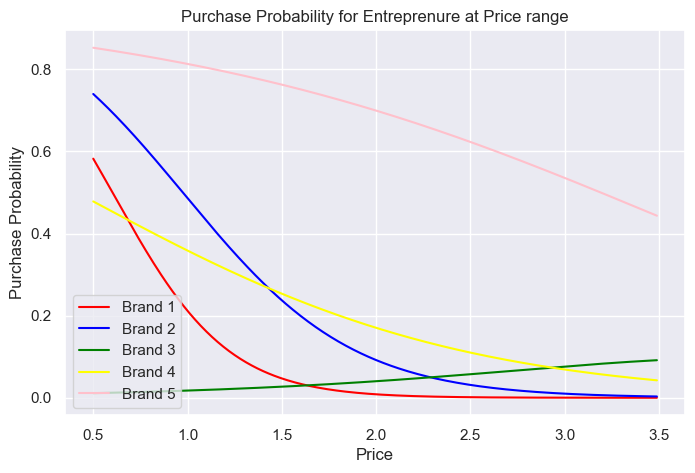

In [141]:
plt.figure(figsize=(8,5))
plt.plot(price_range,predict_own_brand1s2[: , 0], 
         color = "red")

plt.plot(price_range,predict_own_brand2s2[: , 1], 
         color = "blue")

plt.plot(price_range,predict_own_brand3s2[: , 2], 
         color = "green")

plt.plot(price_range,predict_own_brand4s2[: , 3], 
         color = "yellow")

plt.plot(price_range,predict_own_brand5s2[: , 4], 
         color = "pink")

#plt.plot(price_range,crit_val,color = "black",
 #        linestyle = '--',
  #       linewidth=0.5)


plt.xlabel("Price")
plt.ylabel("Purchase Probability")
plt.title("Purchase Probability for Entreprenure at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="lower left")

plt.show();

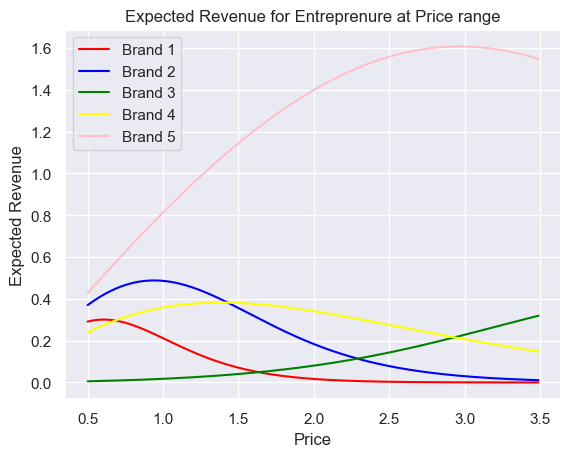

In [142]:
color = ['red','blue','green','yellow','pink']
predict = [predict_own_brand1s2,predict_own_brand2s2,predict_own_brand3s2,predict_own_brand4s2,predict_own_brand5s2]
for i in range(5):
    exp_revenue = predict[i][: , i]*price_range
    plt.plot(price_range,exp_revenue, 
             color = color[i])

plt.xlabel("Price")
plt.ylabel("Expected Revenue")
plt.title("Expected Revenue for Entreprenure at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="upper left")
plt.show();

## Price optimization for each Brand

In [143]:
income_ratios = [df_segm_analysis['Income'][0]/df_segm_analysis['Income'].sum(),df_segm_analysis['Income'][1]/df_segm_analysis['Income'].sum(),df_segm_analysis['Income'][2]/df_segm_analysis['Income'].sum()]

In [144]:
income_ratios[0]+income_ratios[1]+income_ratios[2]

1.0

In [145]:
seg_prop['Segment_prop'][0]

0.206

In [146]:
mean_brand_choice.iloc[1]

Brand_1    0.163670
Brand_2    0.586834
Brand_3    0.068260
Brand_4    0.067780
Brand_5    0.113456
Name: 1.0, dtype: float64

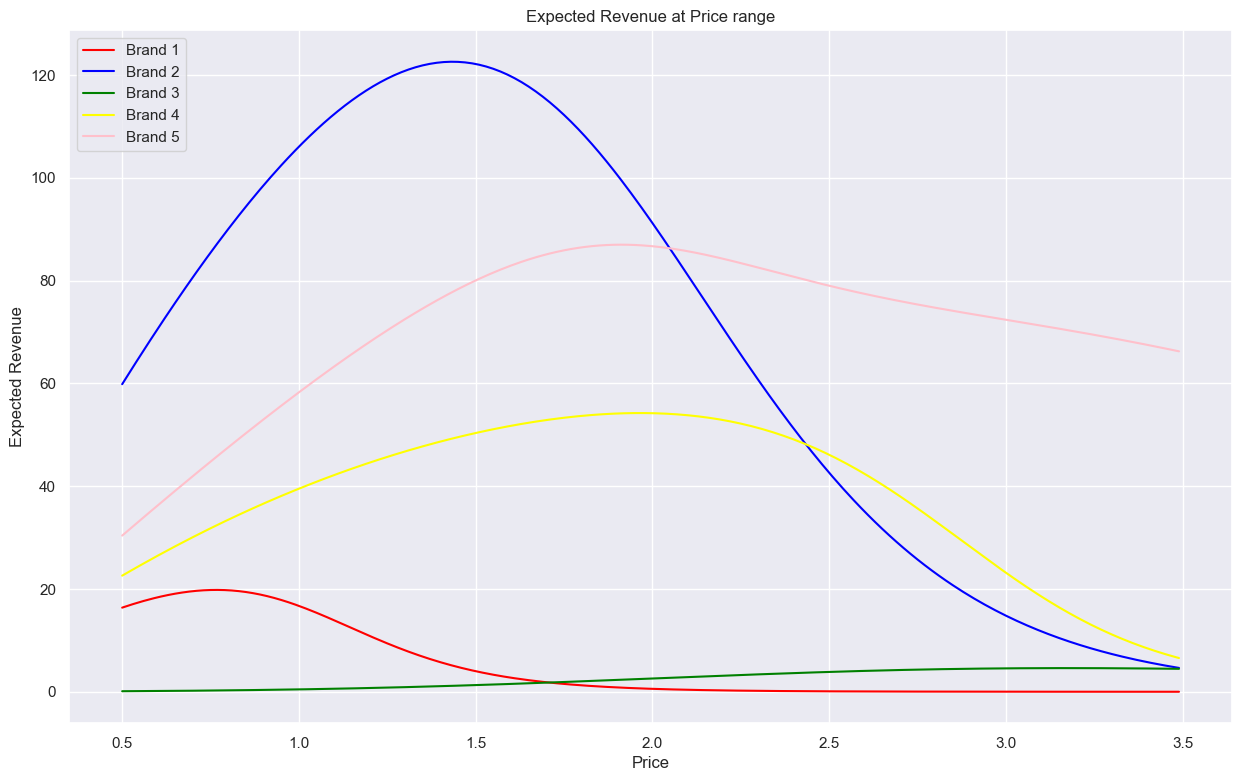

In [147]:
plt.figure(figsize=(15,9))
color = ['red','blue','green','yellow','pink']
predict0 = [predict_own_brand1s0,predict_own_brand2s0,predict_own_brand3s0,predict_own_brand4s0,predict_own_brand5s0]
predict1 = [predict_own_brand1s1,predict_own_brand2s1,predict_own_brand3s1,predict_own_brand4s1,predict_own_brand5s1]
predict2 = [predict_own_brand1s2,predict_own_brand2s2,predict_own_brand3s2,predict_own_brand4s2,predict_own_brand5s2]
for i in range(5):
    exp_revenue = (predict0[i][: , i]*price_range*income_ratios[0]*seg_prop['Segment_prop'][0]*mean_brand_choice.iloc[0][i]+
                   predict1[i][: , i]*price_range*income_ratios[1]*seg_prop['Segment_prop'][1]*mean_brand_choice.iloc[1][i]+
                   predict2[i][: , i]*price_range*income_ratios[2]*seg_prop['Segment_prop'][2]*mean_brand_choice.iloc[2][i])*1000
    
    plt.plot(price_range,exp_revenue, 
             color = color[i])

plt.xlabel("Price")
plt.ylabel("Expected Revenue")
plt.title("Expected Revenue at Price range")
plt.legend(['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5'],
           loc ="upper left")
plt.show();

In [148]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [149]:
y = df_pa['Incidence']

x = pd.DataFrame()
x['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=3) # 80% training and 20% test

In [150]:
X_test

Mean_Price
14343       2.002
45097       2.102
28017       2.006
27966       1.896
39927       2.002
...           ...
26219       2.052
54751       2.088
49205       2.028
3902        1.914
51264       2.022

[11739 rows x 1 columns]

In [151]:
y_test

14343    0
45097    0
28017    0
27966    0
39927    0
        ..
26219    0
54751    0
49205    0
3902     0
51264    0
Name: Incidence, Length: 11739, dtype: int64

In [152]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [153]:
y_pred= classifier.predict(X_test)  
acc= accuracy_score(y_test,y_pred)
acc

0.6894113638299685

In [154]:
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  68.94113638299685


In [155]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.76      0.87      0.81      8841
           1       0.27      0.15      0.19      2898

    accuracy                           0.69     11739
   macro avg       0.51      0.51      0.50     11739
weighted avg       0.64      0.69      0.66     11739



In [156]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
  
# Performing training
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [157]:
y_pred2 = rf.predict(X_test)
acc2= accuracy_score(y_test,y_pred2)
acc2

0.7531305903398927

In [158]:
print ("Accuracy : ",accuracy_score(y_test,y_pred2)*100)

Accuracy :  75.31305903398928


In [159]:
print("Report : ",classification_report(y_test, y_pred2))

Report :                precision    recall  f1-score   support

           0       0.75      1.00      0.86      8841
           1       0.00      0.00      0.00      2898

    accuracy                           0.75     11739
   macro avg       0.38      0.50      0.43     11739
weighted avg       0.57      0.75      0.65     11739



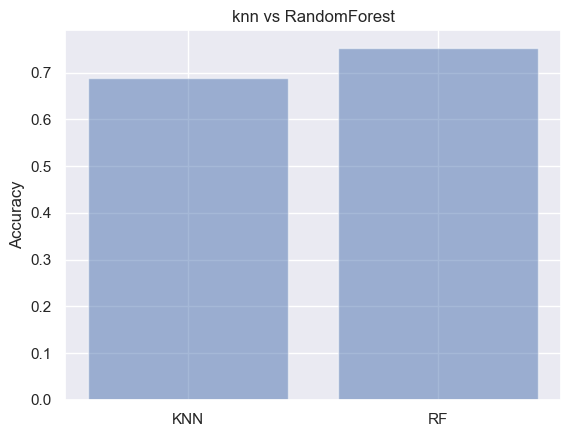

In [160]:
objects = ('KNN','RF')
y_pos = np.arange(len(objects))
performance = [acc,acc2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('knn vs RandomForest')

plt.show()

## Conclusions 

<h5>Brand 1</h5>

> Max Revenue is from Entrepreneur Segment
>
> Max Combined Expected Revenue is at Price 0.8 
>
>> Deeper analysis is required to accurately predict Purchase Probabilities.

<h5>Brand 2</h5>

> Max Revenue is from Entrepreneur Segment
>
> Max Combined Expected Revenue is at Price 1.5 
>
> A slight decrease in price or increase in promotion activities will result in > max revenue
>
> This brand provides the max revenue even though is not a luxury brand

<h5>Brand 3</h5>

> Max Revenue is from Entrepreneur Segment
>
> Unusual behaviour as elasticity is positive only for this brand implying as 
> price increase Purchase probability will also increase indefinitely, despite > not being a luxury brand 
>
>> Deeper analysis is required to accurately predict Purchase Probabilities.

<h5>Brand 4</h5>

> Max Revenue is from Worker Segment
>
> Max Combined Expected Revenue is at Price 2
>
> A slight decrease in price or increase in promotion activities will result in > max revenue<br>
> Although even at current prices, revenue is very close to the potential maximum.
>
> This segment is the smallest among all 3 and have relatively good conversion 
> rate.
>
> Brand_5 is a good substitute if Brand 4 prices go above 2.5 without change 
> in Brand_5 prices. (check Purchase probability plot for this segment)

<h5>Brand 5</h5>

> Max Revenue is from Well-off Segment
>
> Max Combined Expected Revenue is at Price 2
>
> However Expected Revenue for well-off group peaks at price 2.9
>
> This brand provides the second-highest revenue and is a luxury brand
>
> Data implies Well-off segment strongly considers this to provide status value 
> and hence, there are no near substitutes for the well-off segment.